In [ ]:
! pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
import splitfolders
import pandas as pd
import numpy as np
import seaborn as sns

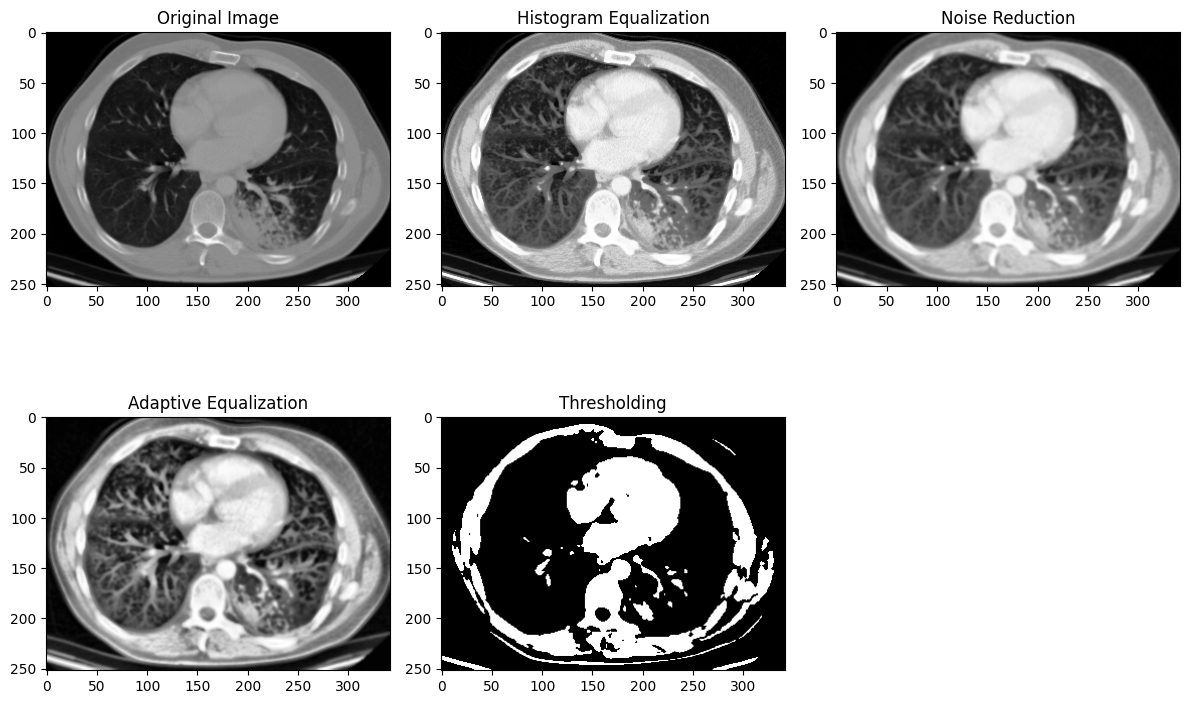

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Unrefined Data/squamous.cell.carcinoma/squamous.cell.carcinoma1.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Histogram Equalization
equalized_image = cv2.equalizeHist(img)

# Noise Reduction using Gaussian Blur
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_equalized_image = clahe.apply(denoised_image)

# Lung Region Extraction using Thresholding
_, binary_image = cv2.threshold(adaptive_equalized_image, 180, 255, cv2.THRESH_BINARY)

# Morphological Operations (Optional)
kernel = np.ones((5, 5), np.uint8)
morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Noise Reduction')

plt.subplot(2, 3, 4)
plt.imshow(adaptive_equalized_image, cmap='gray')
plt.title('Adaptive Equalization')

plt.subplot(2, 3, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholding')

plt.tight_layout()
plt.show()


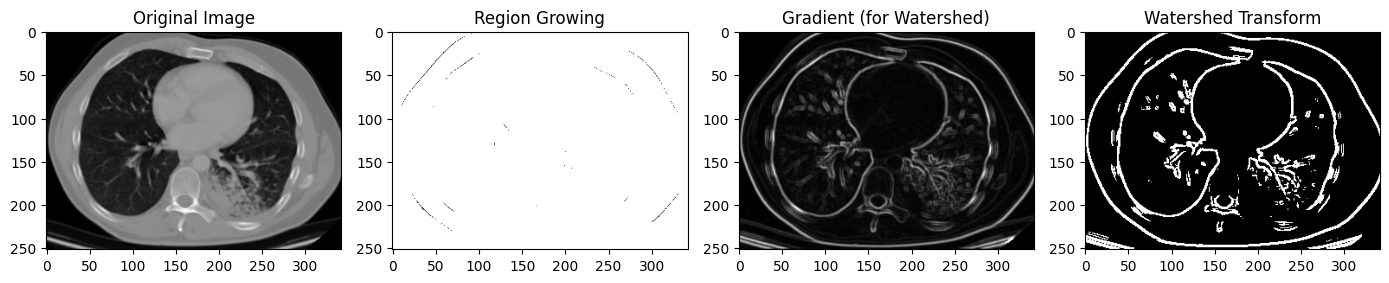

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg

# Load the image
image_path = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Unrefined Data/squamous.cell.carcinoma/squamous.cell.carcinoma1.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Region Growing (Simple example)
seed_point = (100, 100)  # Starting seed point
region_grown = cv2.floodFill(img.copy(), None, seed_point, 255, loDiff=30, upDiff=30)

# Watershed Transform
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
_, watershed_result = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(region_grown[1], cmap='gray')
plt.title('Region Growing')

plt.subplot(2, 4, 3)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient (for Watershed)')

plt.subplot(2, 4, 4)
plt.imshow(watershed_result, cmap='gray')
plt.title('Watershed Transform')


plt.tight_layout()
plt.show()


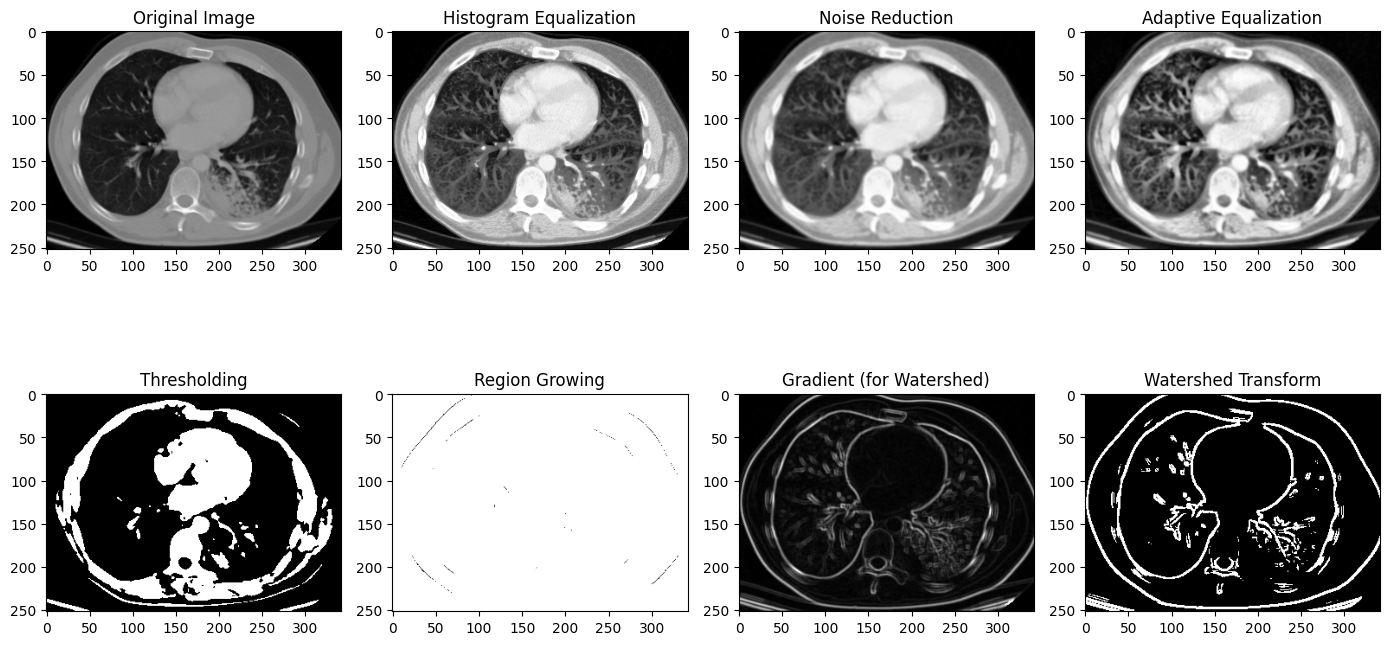

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Unrefined Data/squamous.cell.carcinoma/squamous.cell.carcinoma1.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Image Preprocessing

# Histogram Equalization
equalized_image = cv2.equalizeHist(img)

# Noise Reduction using Gaussian Blur
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_equalized_image = clahe.apply(denoised_image)

# Lung Region Extraction using Thresholding
_, binary_image = cv2.threshold(adaptive_equalized_image, 180, 255, cv2.THRESH_BINARY)

# Image Segmentation

# Region Growing
seed_point = (100, 100)  # Starting seed point
region_grown = cv2.floodFill(img.copy(), None, seed_point, 255, loDiff=30, upDiff=30)

# Watershed Transform
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
_, watershed_result = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 4, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Noise Reduction')

plt.subplot(2, 4, 4)
plt.imshow(adaptive_equalized_image, cmap='gray')
plt.title('Adaptive Equalization')

plt.subplot(2, 4, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholding')

plt.subplot(2, 4, 6)
plt.imshow(region_grown[1], cmap='gray')
plt.title('Region Growing')

plt.subplot(2, 4, 7)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient (for Watershed)')

plt.subplot(2, 4, 8)
plt.imshow(watershed_result, cmap='gray')
plt.title('Watershed Transform')

plt.tight_layout()
plt.show()


In [ ]:
print(os.getcwd(), os.listdir())
DIR = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Unrefined Data'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Data Feeding'

/content ['.config', 'drive', 'sample_data']


In [ ]:
import cv2
import os

# Define directory paths and categories
DIR = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Unrefined Data'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']
DEST_DIR = '/content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Data Feeding'

# Check if the destination directory exists; if not, create it
if not os.path.exists(DEST_DIR):
    os.makedirs(os.path.join(DEST_DIR, 'cancerous'))
    os.makedirs(os.path.join(DEST_DIR, 'non-cancerous'))

# Loop through image categories
for category in CATS:
    source_path = os.path.join(DIR, category)
    dest_path = os.path.join(DEST_DIR, 'cancerous' if category != 'normal' else 'non-cancerous')

    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # Process images in the current category
    for image_filename in os.listdir(source_path):
        image_path = os.path.join(source_path, image_filename)

        # Load the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Image Preprocessing

        # Histogram Equalization
        equalized_image = cv2.equalizeHist(img)

        # Noise Reduction using Gaussian Blur
        denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

        # Adaptive Histogram Equalization (CLAHE)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        adaptive_equalized_image = clahe.apply(denoised_image)

        # Lung Region Extraction using Thresholding
        _, segmented_image = cv2.threshold(adaptive_equalized_image, 180, 255, cv2.THRESH_BINARY)

        # Image Segmentation Techniques

        # Region Growing
        seed_point = (100, 100)
        region_grown = cv2.floodFill(img.copy(), None, seed_point, 255, loDiff=30, upDiff=30)

        # Watershed Transform
        gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
        _, watershed_result = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Determine the destination path for the segmented image
        dest_image_path = os.path.join(dest_path, image_filename)

        # Save the segmented image to the destination path
        cv2.imwrite(dest_image_path, segmented_image)

print("Processed data directory created successfully at", DEST_DIR)


Processed data directory created successfully at /content/drive/MyDrive/DLCT_LungDetectNet/DLCTLungDetectNet/Data Feeding


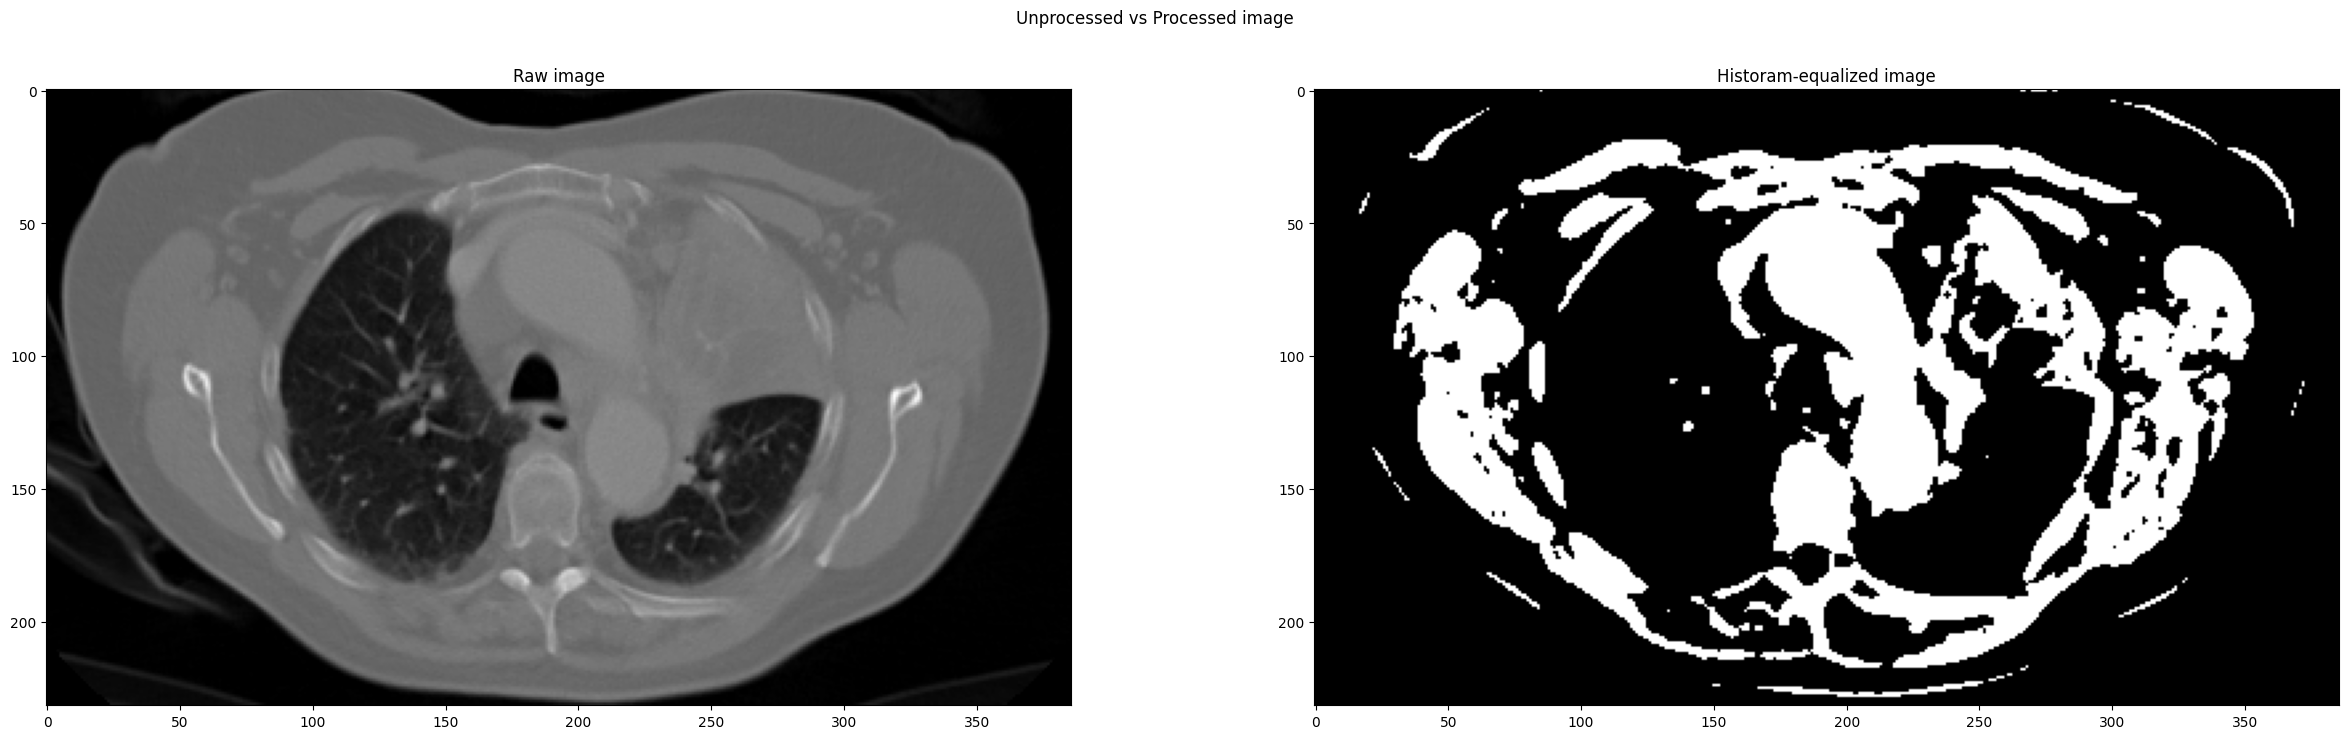

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

In [ ]:
FINAL_DIR = './PreprocessedData'

splitfolders.ratio(DEST_DIR, output=FINAL_DIR, seed=69420, ratio=(.7, 0.1,0.2))

Copying files: 1000 files [00:02, 365.44 files/s]


In [ ]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/PreprocessedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 699 images belonging to 2 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/PreprocessedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/PreprocessedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 202 images belonging to 2 classes.


In [ ]:
def F1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),
      tf.keras.metrics.AUC(name='AUC'),
      F1,
]

def plot_history(hist, name):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].plot(hist.history['Accuracy'])
  axs[0].plot(hist.history['val_Accuracy'])
  axs[0].set_title(f'{name} Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['train', 'val', 'F1', 'Recall'], loc='upper left')

  axs[1].plot(hist.history['loss'])
  axs[1].plot(hist.history['val_loss'])
  axs[1].set_title(f'{name} Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'val'], loc='upper left')

  axs[2].plot(hist.history['Precision'])
  axs[2].plot(hist.history['val_Precision'])
  axs[2].set_title(f'{name} Precision')
  axs[2].set_ylabel('Precision')
  axs[2].set_xlabel('Epoch')
  axs[2].legend(['train', 'val'], loc='upper left')

  plt.show()

##CNN Model

In [ ]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)


CNN_history = CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7273 - Accuracy: 0.7639 - Precision: 0.2000 - Recall: 0.0333 - AUC: 0.4672 - F1: 0.0152

22/22 [==============================] - 26s 534ms/step - loss: 0.7273 - Accuracy: 0.7639 - Precision: 0.2000 - Recall: 0.0333 - AUC: 0.4672 - F1: 0.0152 - val_loss: 0.5251 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.5027 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5039 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6229 - F1: 0.0000e+00

22/22 [==============================] - 15s 663ms/step - loss: 0.5039 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6229 - F1: 0.0000e+00 - val_loss: 0.4158 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9194 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4498 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7622 - F1: 0.0000e+00

22/22 [==============================] - 11s 509ms/step - loss: 0.4498 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7622 - F1: 0.0000e+00 - val_loss: 0.4866 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8797 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4314 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7921 - F1: 0.0000e+00

22/22 [==============================] - 9s 416ms/step - loss: 0.4314 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7921 - F1: 0.0000e+00 - val_loss: 0.3897 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9429 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4130 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.8222 - F1: 0.0000e+00

22/22 [==============================] - 11s 493ms/step - loss: 0.4130 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.8222 - F1: 0.0000e+00 - val_loss: 0.4072 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9100 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3686 - Accuracy: 0.8197 - Precision: 1.0000 - Recall: 0.1600 - AUC: 0.8666 - F1: 0.2393

22/22 [==============================] - 11s 498ms/step - loss: 0.3686 - Accuracy: 0.8197 - Precision: 1.0000 - Recall: 0.1600 - AUC: 0.8666 - F1: 0.2393 - val_loss: 0.4429 - val_Accuracy: 0.9091 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.8919 - val_F1: 0.5264 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3511 - Accuracy: 0.8741 - Precision: 1.0000 - Recall: 0.4133 - AUC: 0.8928 - F1: 0.5106
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 11s 499ms/step - loss: 0.3511 - Accuracy: 0.8741 - Precision: 1.0000 - Recall: 0.4133 - AUC: 0.8928 - F1: 0.5106 - val_loss: 0.6500 - val_Accuracy: 0.6465 - val_Precision: 0.3654 - val_Recall: 0.9048 - val_AUC: 0.7500 - val_F1: 0.5487 - lr: 0.0010
Epoch 7: early stopping


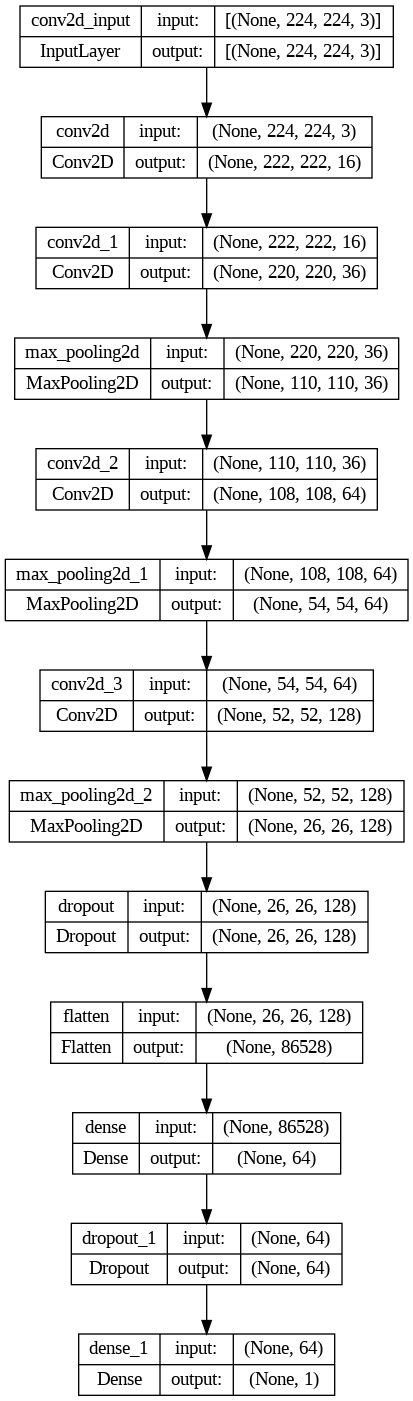

In [ ]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)
Image(filename='CNN.png')

In [ ]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 120ms/step - loss: 0.6497 - Accuracy: 0.6931 - Precision: 0.4135 - Recall: 0.9773 - AUC: 0.8283 - F1: 0.5678


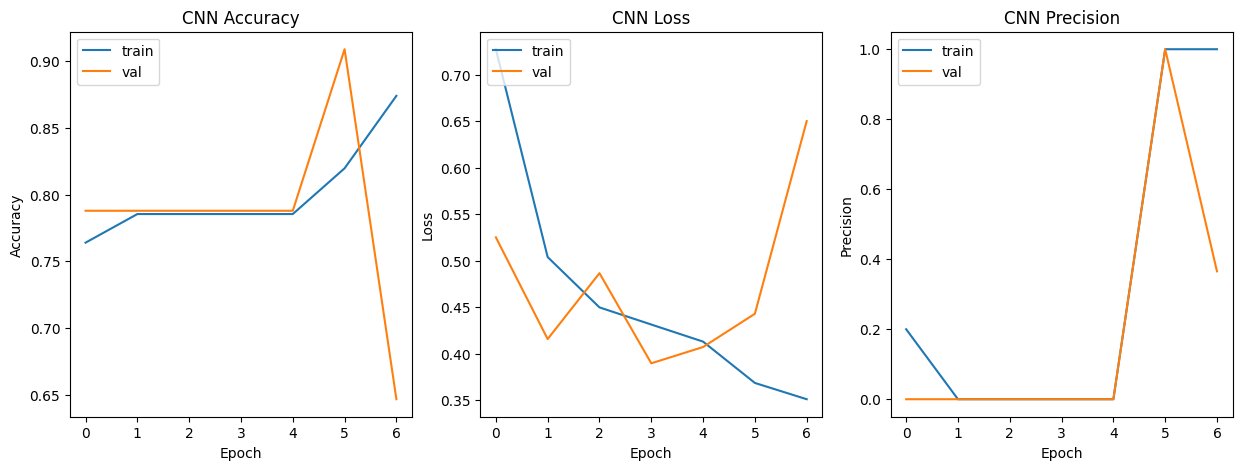

In [ ]:
plot_history(CNN_history, 'CNN')

#FusionNet Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, concatenate, Input
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet_base.layers:
    layer.trainable = False  # Freeze the ResNet layers

# Load the pre-trained InceptionV3 model
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in inception_base.layers:
    layer.trainable = False  # Freeze the Inception layers

# Image input
image_input = Input(shape=(224, 224, 3))

# Extract features using ResNet50
resnet_features = resnet_base(image_input)
resnet_flattened = Flatten()(resnet_features)

# Extract features using InceptionV3
inception_features = inception_base(image_input)
inception_flattened = Flatten()(inception_features)

# Concatenate features from ResNet50 and InceptionV3
concatenated = concatenate([resnet_flattened, inception_flattened])

# Dense layers for further processing
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the hybrid model
hybrid_model = Model(inputs=image_input, outputs=output)

# Summary of the hybrid model
hybrid_model.summary()

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 7, 7, 2048)           2358771   ['input_10[0][0]']            
                                                          2                                       
                                                                                                  
 inception_v3 (Functional)   (None, 5, 5, 2048)           2180278   ['input_10[0][0]']            
                                                          4                                       
                                                                                            

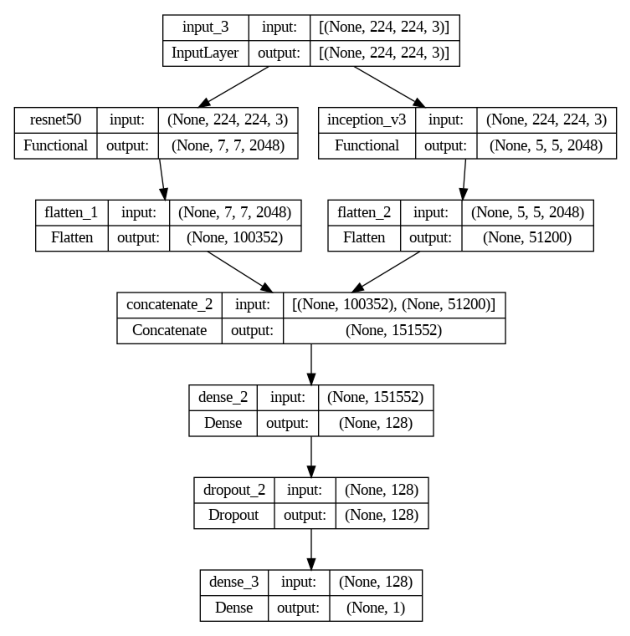

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Assuming hybrid_model is the model you want to plot

# Plot the hybrid model and save it to a file
plot_model(hybrid_model, to_file='hybrid_model.png', show_shapes=True, show_layer_names=True)

# Display the plot using matplotlib
img = plt.imread('hybrid_model.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  # Hide axis numbers and ticks
plt.show()


In [ ]:
import tensorflow as tf

# Assuming you have defined and compiled the 'hybrid_model' and loaded your datasets accordingly

# Define the callbacks
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.50, min_lr=1e-7)
mcp = tf.keras.callbacks.ModelCheckpoint('hybrid_model.h5', save_best_only=True, mode='auto', monitor='val_accuracy')
es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

# Train the hybrid model
hybrid_history = hybrid_model.fit(train_dataset, validation_data=valid_dataset, epochs=36, verbose=1, callbacks=[lrd, mcp, es], shuffle=True)


Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 4.0672 - Accuracy: 0.8169 - Precision: 0.5912 - Recall: 0.4845 - AUC: 0.7680 - F1: 0.5319

22/22 [==============================] - 24s 669ms/step - loss: 4.0672 - Accuracy: 0.8169 - Precision: 0.5912 - Recall: 0.4845 - AUC: 0.7680 - F1: 0.5319 - val_loss: 0.9539 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9219 - val_F1: 0.9115 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.8009 - Accuracy: 0.9270 - Precision: 0.8462 - Recall: 0.8067 - AUC: 0.9164 - F1: 0.8165

22/22 [==============================] - 12s 547ms/step - loss: 0.8009 - Accuracy: 0.9270 - Precision: 0.8462 - Recall: 0.8067 - AUC: 0.9164 - F1: 0.8165 - val_loss: 1.0190 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9216 - val_F1: 0.6891 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.3719 - Accuracy: 0.9557 - Precision: 0.9048 - Recall: 0.8867 - AUC: 0.9598 - F1: 0.8885

22/22 [==============================] - 11s 511ms/step - loss: 0.3719 - Accuracy: 0.9557 - Precision: 0.9048 - Recall: 0.8867 - AUC: 0.9598 - F1: 0.8885 - val_loss: 0.2968 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9206 - val_F1: 0.8725 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.1654 - Accuracy: 0.9485 - Precision: 0.8851 - Recall: 0.8733 - AUC: 0.9792 - F1: 0.8804

22/22 [==============================] - 11s 478ms/step - loss: 0.1654 - Accuracy: 0.9485 - Precision: 0.8851 - Recall: 0.8733 - AUC: 0.9792 - F1: 0.8804 - val_loss: 0.1198 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9908 - val_F1: 0.6495 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.1472 - Accuracy: 0.9614 - Precision: 0.9184 - Recall: 0.9000 - AUC: 0.9758 - F1: 0.9117

22/22 [==============================] - 12s 542ms/step - loss: 0.1472 - Accuracy: 0.9614 - Precision: 0.9184 - Recall: 0.9000 - AUC: 0.9758 - F1: 0.9117 - val_loss: 0.0905 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.9035 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.0885 - Accuracy: 0.9671 - Precision: 0.9379 - Recall: 0.9067 - AUC: 0.9924 - F1: 0.9105

22/22 [==============================] - 12s 548ms/step - loss: 0.0885 - Accuracy: 0.9671 - Precision: 0.9379 - Recall: 0.9067 - AUC: 0.9924 - F1: 0.9105 - val_loss: 0.0796 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9976 - val_F1: 0.6786 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.1193 - Accuracy: 0.9614 - Precision: 0.9184 - Recall: 0.9000 - AUC: 0.9864 - F1: 0.9058

22/22 [==============================] - 13s 574ms/step - loss: 0.1193 - Accuracy: 0.9614 - Precision: 0.9184 - Recall: 0.9000 - AUC: 0.9864 - F1: 0.9058 - val_loss: 0.1282 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9887 - val_F1: 0.5583 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.1143 - Accuracy: 0.9599 - Precision: 0.9420 - Recall: 0.8667 - AUC: 0.9866 - F1: 0.8896

22/22 [==============================] - 12s 550ms/step - loss: 0.1143 - Accuracy: 0.9599 - Precision: 0.9420 - Recall: 0.8667 - AUC: 0.9866 - F1: 0.8896 - val_loss: 0.1148 - val_Accuracy: 0.9293 - val_Precision: 0.9375 - val_Recall: 0.7143 - val_AUC: 0.9963 - val_F1: 0.8571 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.1081 - Accuracy: 0.9714 - Precision: 0.9514 - Recall: 0.9133 - AUC: 0.9819 - F1: 0.9239
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 12s 549ms/step - loss: 0.1081 - Accuracy: 0.9714 - Precision: 0.9514 - Recall: 0.9133 - AUC: 0.9819 - F1: 0.9239 - val_loss: 0.1077 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9951 - val_F1: 0.6726 - lr: 0.0010
Epoch 9: early stopping


In [ ]:
# Assuming you have defined and compiled the 'hybrid_model' and loaded your test dataset accordingly

# Evaluate the hybrid model on the test dataset
hybrid_scores = hybrid_model.evaluate(test_dataset, verbose=1)

# Print the evaluation scores
print('Test Loss:', hybrid_scores[0])
print('Test Accuracy:', hybrid_scores[1])


7/7 [==============================] - 3s 470ms/step - loss: 0.0983 - accuracy: 0.9802
Test Loss: 0.09832466393709183
Test Accuracy: 0.9801980257034302


In [ ]:
hybrid_scores = hybrid_model.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 161ms/step - loss: 0.0989 - Accuracy: 0.9653 - Precision: 0.9111 - Recall: 0.9318 - AUC: 0.9960 - F1: 0.8832


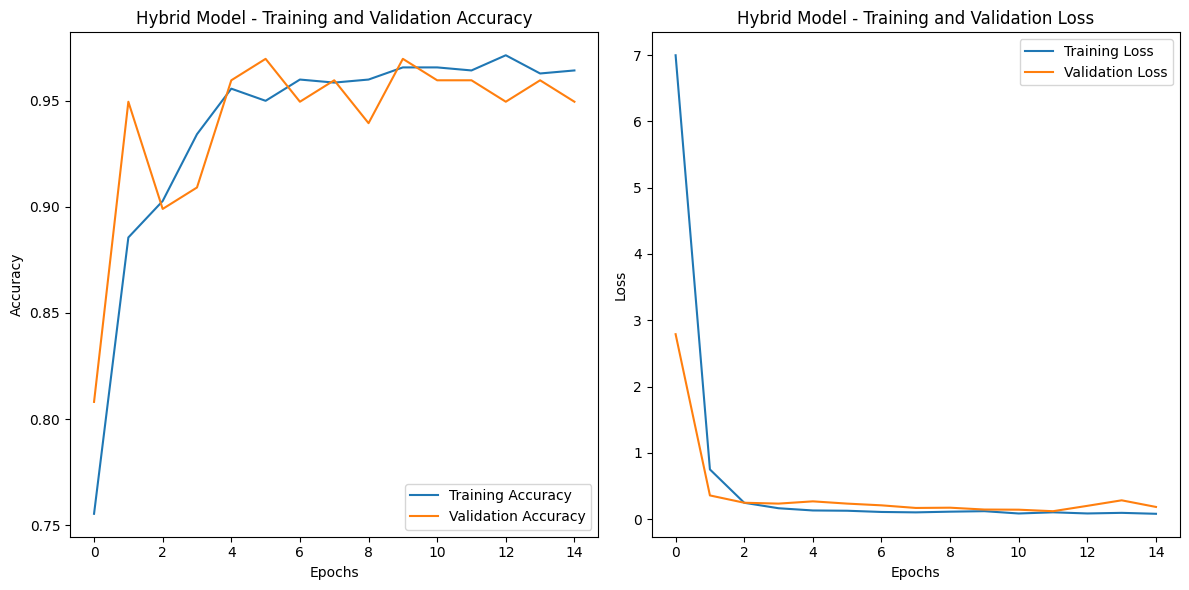

In [ ]:


# Plot the training history for the hybrid model
plot_history(hybrid_history, 'Hybrid Model')


#VGG 16 Model

In [ ]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_94 (Ba  (None, 25088)             100352    
 tchNormalization)                                               
                                                                 
 dense_4 (Dense)             (None, 32)                802848    
                                                                 
 batch_normalization_95 (Ba  (None, 32)                

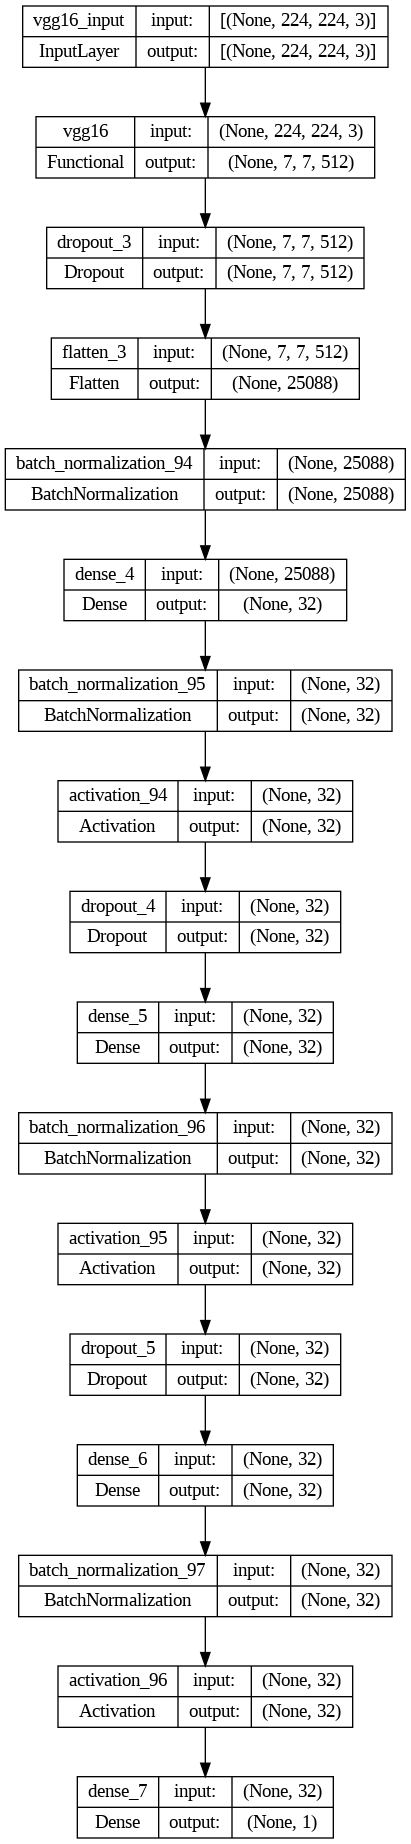

In [ ]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG16.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16_history = VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 36, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7635 - Accuracy: 0.5205 - Precision: 0.2729 - Recall: 0.7371 - AUC: 0.5834 - F1: 0.3498

22/22 [==============================] - 28s 820ms/step - loss: 0.7635 - Accuracy: 0.5205 - Precision: 0.2729 - Recall: 0.7371 - AUC: 0.5834 - F1: 0.3498 - val_loss: 0.3951 - val_Accuracy: 0.9192 - val_Precision: 1.0000 - val_Recall: 0.6190 - val_AUC: 0.8852 - val_F1: 0.7560 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5911 - Accuracy: 0.7082 - Precision: 0.3893 - Recall: 0.6333 - AUC: 0.7405 - F1: 0.4802

22/22 [==============================] - 14s 620ms/step - loss: 0.5911 - Accuracy: 0.7082 - Precision: 0.3893 - Recall: 0.6333 - AUC: 0.7405 - F1: 0.4802 - val_loss: 0.3606 - val_Accuracy: 0.8990 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.8736 - val_F1: 0.5136 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.5093 - Accuracy: 0.8097 - Precision: 0.5620 - Recall: 0.5133 - AUC: 0.7973 - F1: 0.5285

22/22 [==============================] - 14s 618ms/step - loss: 0.5093 - Accuracy: 0.8097 - Precision: 0.5620 - Recall: 0.5133 - AUC: 0.7973 - F1: 0.5285 - val_loss: 0.3315 - val_Accuracy: 0.9293 - val_Precision: 0.9375 - val_Recall: 0.7143 - val_AUC: 0.9765 - val_F1: 0.6335 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4408 - Accuracy: 0.8469 - Precision: 0.6937 - Recall: 0.5133 - AUC: 0.8454 - F1: 0.5901

22/22 [==============================] - 12s 531ms/step - loss: 0.4408 - Accuracy: 0.8469 - Precision: 0.6937 - Recall: 0.5133 - AUC: 0.8454 - F1: 0.5901 - val_loss: 0.3194 - val_Accuracy: 0.9293 - val_Precision: 1.0000 - val_Recall: 0.6667 - val_AUC: 0.9582 - val_F1: 0.7668 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3939 - Accuracy: 0.8670 - Precision: 0.7879 - Recall: 0.5200 - AUC: 0.8659 - F1: 0.6250

22/22 [==============================] - 12s 526ms/step - loss: 0.3939 - Accuracy: 0.8670 - Precision: 0.7879 - Recall: 0.5200 - AUC: 0.8659 - F1: 0.6250 - val_loss: 0.2953 - val_Accuracy: 0.9091 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.9545 - val_F1: 0.5479 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3568 - Accuracy: 0.8798 - Precision: 0.8367 - Recall: 0.5467 - AUC: 0.8937 - F1: 0.6519

22/22 [==============================] - 10s 473ms/step - loss: 0.3568 - Accuracy: 0.8798 - Precision: 0.8367 - Recall: 0.5467 - AUC: 0.8937 - F1: 0.6519 - val_loss: 0.2680 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9710 - val_F1: 0.6976 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3282 - Accuracy: 0.8884 - Precision: 0.8600 - Recall: 0.5733 - AUC: 0.8975 - F1: 0.6946

22/22 [==============================] - 13s 598ms/step - loss: 0.3282 - Accuracy: 0.8884 - Precision: 0.8600 - Recall: 0.5733 - AUC: 0.8975 - F1: 0.6946 - val_loss: 0.2298 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9911 - val_F1: 0.9030 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2712 - Accuracy: 0.9099 - Precision: 0.8919 - Recall: 0.6600 - AUC: 0.9576 - F1: 0.7633

22/22 [==============================] - 12s 534ms/step - loss: 0.2712 - Accuracy: 0.9099 - Precision: 0.8919 - Recall: 0.6600 - AUC: 0.9576 - F1: 0.7633 - val_loss: 0.2128 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9902 - val_F1: 0.9138 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2707 - Accuracy: 0.8999 - Precision: 0.8448 - Recall: 0.6533 - AUC: 0.9365 - F1: 0.7308

22/22 [==============================] - 12s 529ms/step - loss: 0.2707 - Accuracy: 0.8999 - Precision: 0.8448 - Recall: 0.6533 - AUC: 0.9365 - F1: 0.7308 - val_loss: 0.1898 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9927 - val_F1: 0.6280 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2261 - Accuracy: 0.9199 - Precision: 0.9273 - Recall: 0.6800 - AUC: 0.9552 - F1: 0.7868

22/22 [==============================] - 12s 528ms/step - loss: 0.2261 - Accuracy: 0.9199 - Precision: 0.9273 - Recall: 0.6800 - AUC: 0.9552 - F1: 0.7868 - val_loss: 0.1718 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9948 - val_F1: 0.6832 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2359 - Accuracy: 0.9213 - Precision: 0.8682 - Recall: 0.7467 - AUC: 0.9504 - F1: 0.8028

22/22 [==============================] - 10s 455ms/step - loss: 0.2359 - Accuracy: 0.9213 - Precision: 0.8682 - Recall: 0.7467 - AUC: 0.9504 - F1: 0.8028 - val_loss: 0.1655 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9911 - val_F1: 0.7030 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2182 - Accuracy: 0.9285 - Precision: 0.9032 - Recall: 0.7467 - AUC: 0.9636 - F1: 0.8121

22/22 [==============================] - 12s 517ms/step - loss: 0.2182 - Accuracy: 0.9285 - Precision: 0.9032 - Recall: 0.7467 - AUC: 0.9636 - F1: 0.8121 - val_loss: 0.1232 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9875 - val_F1: 0.6717 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1897 - Accuracy: 0.9313 - Precision: 0.9048 - Recall: 0.7600 - AUC: 0.9688 - F1: 0.8083

22/22 [==============================] - 12s 533ms/step - loss: 0.1897 - Accuracy: 0.9313 - Precision: 0.9048 - Recall: 0.7600 - AUC: 0.9688 - F1: 0.8083 - val_loss: 0.1154 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9930 - val_F1: 0.9018 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1933 - Accuracy: 0.9213 - Precision: 0.8626 - Recall: 0.7533 - AUC: 0.9690 - F1: 0.7992

22/22 [==============================] - 12s 528ms/step - loss: 0.1933 - Accuracy: 0.9213 - Precision: 0.8626 - Recall: 0.7533 - AUC: 0.9690 - F1: 0.7992 - val_loss: 0.1208 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9795 - val_F1: 0.8995 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1725 - Accuracy: 0.9456 - Precision: 0.9308 - Recall: 0.8067 - AUC: 0.9743 - F1: 0.8664

22/22 [==============================] - 11s 525ms/step - loss: 0.1725 - Accuracy: 0.9456 - Precision: 0.9308 - Recall: 0.8067 - AUC: 0.9743 - F1: 0.8664 - val_loss: 0.1276 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9835 - val_F1: 0.9167 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1999 - Accuracy: 0.9256 - Precision: 0.8403 - Recall: 0.8067 - AUC: 0.9690 - F1: 0.7985

22/22 [==============================] - 12s 533ms/step - loss: 0.1999 - Accuracy: 0.9256 - Precision: 0.8403 - Recall: 0.8067 - AUC: 0.9690 - F1: 0.7985 - val_loss: 0.0925 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9808 - val_F1: 0.7308 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1457 - Accuracy: 0.9485 - Precision: 0.9254 - Recall: 0.8267 - AUC: 0.9826 - F1: 0.8611

22/22 [==============================] - 13s 595ms/step - loss: 0.1457 - Accuracy: 0.9485 - Precision: 0.9254 - Recall: 0.8267 - AUC: 0.9826 - F1: 0.8611 - val_loss: 0.0924 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9774 - val_F1: 0.9188 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.1717 - Accuracy: 0.9356 - Precision: 0.8777 - Recall: 0.8133 - AUC: 0.9778 - F1: 0.8319

22/22 [==============================] - 12s 525ms/step - loss: 0.1717 - Accuracy: 0.9356 - Precision: 0.8777 - Recall: 0.8133 - AUC: 0.9778 - F1: 0.8319 - val_loss: 0.0913 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9844 - val_F1: 0.6591 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.1315 - Accuracy: 0.9528 - Precision: 0.9270 - Recall: 0.8467 - AUC: 0.9875 - F1: 0.8746

22/22 [==============================] - 12s 525ms/step - loss: 0.1315 - Accuracy: 0.9528 - Precision: 0.9270 - Recall: 0.8467 - AUC: 0.9875 - F1: 0.8746 - val_loss: 0.0961 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9832 - val_F1: 0.6726 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.1351 - Accuracy: 0.9528 - Precision: 0.9209 - Recall: 0.8533 - AUC: 0.9861 - F1: 0.8774

22/22 [==============================] - 12s 534ms/step - loss: 0.1351 - Accuracy: 0.9528 - Precision: 0.9209 - Recall: 0.8533 - AUC: 0.9861 - F1: 0.8774 - val_loss: 0.0929 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9792 - val_F1: 0.6867 - lr: 0.0010
Epoch 21/36
22/22 [==============================] - ETA: 0s - loss: 0.1646 - Accuracy: 0.9442 - Precision: 0.9111 - Recall: 0.8200 - AUC: 0.9685 - F1: 0.8565

22/22 [==============================] - 11s 477ms/step - loss: 0.1646 - Accuracy: 0.9442 - Precision: 0.9111 - Recall: 0.8200 - AUC: 0.9685 - F1: 0.8565 - val_loss: 0.0705 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9850 - val_F1: 0.9868 - lr: 0.0010
Epoch 22/36
22/22 [==============================] - ETA: 0s - loss: 0.1508 - Accuracy: 0.9428 - Precision: 0.8873 - Recall: 0.8400 - AUC: 0.9754 - F1: 0.8524

22/22 [==============================] - 12s 527ms/step - loss: 0.1508 - Accuracy: 0.9428 - Precision: 0.8873 - Recall: 0.8400 - AUC: 0.9754 - F1: 0.8524 - val_loss: 0.0706 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9762 - val_F1: 0.9808 - lr: 0.0010
Epoch 23/36
22/22 [==============================] - ETA: 0s - loss: 0.1275 - Accuracy: 0.9657 - Precision: 0.9375 - Recall: 0.9000 - AUC: 0.9757 - F1: 0.9173

22/22 [==============================] - 12s 526ms/step - loss: 0.1275 - Accuracy: 0.9657 - Precision: 0.9375 - Recall: 0.9000 - AUC: 0.9757 - F1: 0.9173 - val_loss: 0.0648 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9863 - val_F1: 0.7333 - lr: 0.0010
Epoch 24/36
22/22 [==============================] - ETA: 0s - loss: 0.1499 - Accuracy: 0.9528 - Precision: 0.9091 - Recall: 0.8667 - AUC: 0.9739 - F1: 0.8841

22/22 [==============================] - 10s 451ms/step - loss: 0.1499 - Accuracy: 0.9528 - Precision: 0.9091 - Recall: 0.8667 - AUC: 0.9739 - F1: 0.8841 - val_loss: 0.0624 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9948 - val_F1: 0.9773 - lr: 0.0010
Epoch 25/36
22/22 [==============================] - ETA: 0s - loss: 0.1417 - Accuracy: 0.9514 - Precision: 0.8919 - Recall: 0.8800 - AUC: 0.9769 - F1: 0.8787

22/22 [==============================] - 12s 510ms/step - loss: 0.1417 - Accuracy: 0.9514 - Precision: 0.8919 - Recall: 0.8800 - AUC: 0.9769 - F1: 0.8787 - val_loss: 0.0662 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9918 - val_F1: 0.9353 - lr: 0.0010
Epoch 26/36
22/22 [==============================] - ETA: 0s - loss: 0.1213 - Accuracy: 0.9585 - Precision: 0.9416 - Recall: 0.8600 - AUC: 0.9855 - F1: 0.9042

22/22 [==============================] - 12s 532ms/step - loss: 0.1213 - Accuracy: 0.9585 - Precision: 0.9416 - Recall: 0.8600 - AUC: 0.9855 - F1: 0.9042 - val_loss: 0.0618 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9948 - val_F1: 0.9773 - lr: 0.0010
Epoch 27/36
22/22 [==============================] - ETA: 0s - loss: 0.1419 - Accuracy: 0.9456 - Precision: 0.8944 - Recall: 0.8467 - AUC: 0.9808 - F1: 0.8663

22/22 [==============================] - 12s 534ms/step - loss: 0.1419 - Accuracy: 0.9456 - Precision: 0.8944 - Recall: 0.8467 - AUC: 0.9808 - F1: 0.8663 - val_loss: 0.0618 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9884 - val_F1: 0.9643 - lr: 0.0010
Epoch 28/36
22/22 [==============================] - ETA: 0s - loss: 0.1093 - Accuracy: 0.9614 - Precision: 0.9020 - Recall: 0.9200 - AUC: 0.9910 - F1: 0.9047

22/22 [==============================] - 11s 518ms/step - loss: 0.1093 - Accuracy: 0.9614 - Precision: 0.9020 - Recall: 0.9200 - AUC: 0.9910 - F1: 0.9047 - val_loss: 0.0702 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9768 - val_F1: 0.7141 - lr: 0.0010
Epoch 29/36
22/22 [==============================] - ETA: 0s - loss: 0.1281 - Accuracy: 0.9571 - Precision: 0.8947 - Recall: 0.9067 - AUC: 0.9880 - F1: 0.8629
Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 10s 455ms/step - loss: 0.1281 - Accuracy: 0.9571 - Precision: 0.8947 - Recall: 0.9067 - AUC: 0.9880 - F1: 0.8629 - val_loss: 0.0712 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9634 - val_F1: 0.9773 - lr: 0.0010
Epoch 29: early stopping


In [ ]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 3s 435ms/step - loss: 0.0230 - Accuracy: 0.9950 - Precision: 0.9778 - Recall: 1.0000 - AUC: 1.0000 - F1: 0.9925


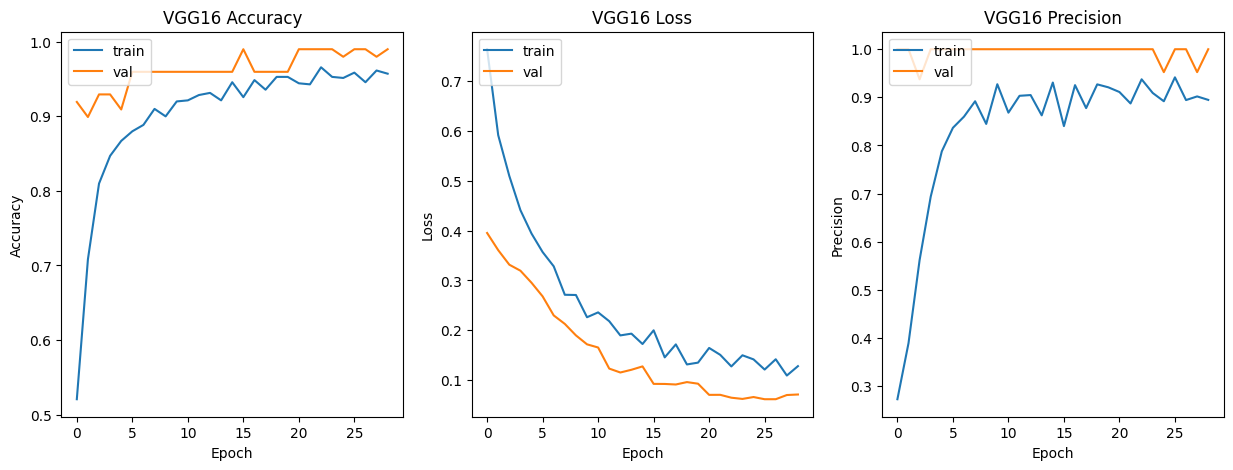

In [ ]:
plot_history(VGG16_history, 'VGG16')

#VGG 19 Model

In [ ]:
VGG19_base = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG19_base.layers:
    layer.trainable = False

VGG19=tf.keras.Sequential()
VGG19.add(VGG19_base)
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Flatten())
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG19.summary()

VGG19.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_98 (Ba  (None, 25088)             100352    
 tchNormalization)                                               
                                                                 
 dense_8 (Dense)             (None, 32)                802848    
                                                                 
 batch_normalization_99 (Ba  (None, 32)                

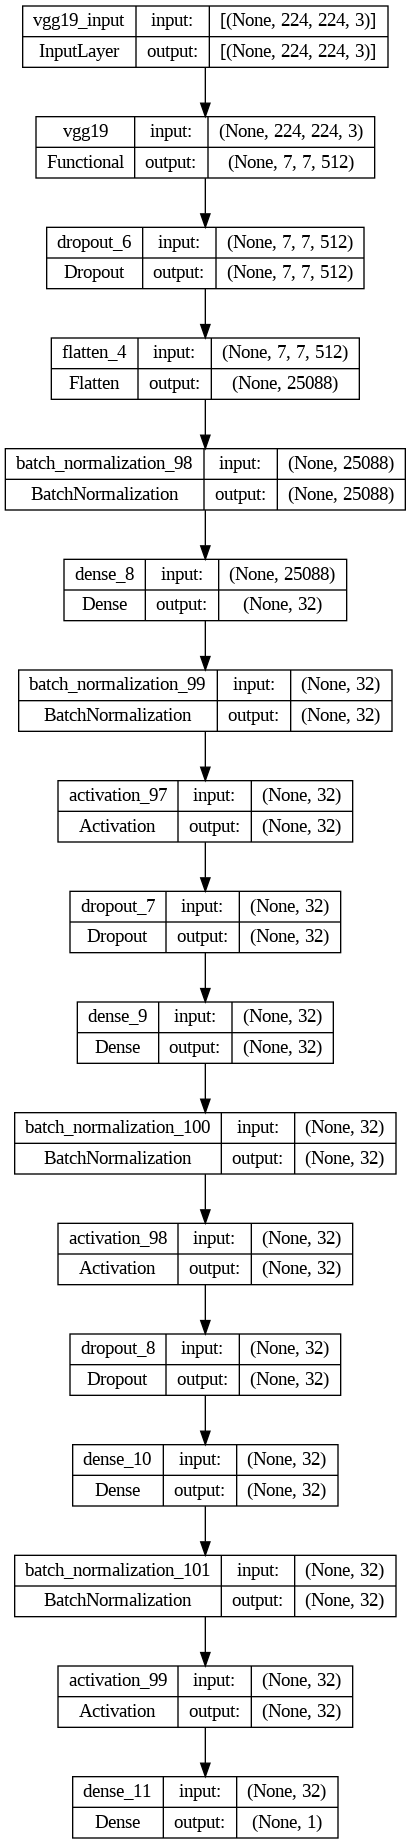

In [ ]:
tf.keras.utils.plot_model(VGG19, to_file='./VGG19.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG19.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG19.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG19_history = VGG19.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7332 - Accuracy: 0.4778 - Precision: 0.2222 - Recall: 0.5733 - AUC: 0.5501 - F1: 0.3118

22/22 [==============================] - 16s 520ms/step - loss: 0.7332 - Accuracy: 0.4778 - Precision: 0.2222 - Recall: 0.5733 - AUC: 0.5501 - F1: 0.3118 - val_loss: 0.9236 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8675 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5665 - Accuracy: 0.7067 - Precision: 0.3733 - Recall: 0.5400 - AUC: 0.7259 - F1: 0.4445

22/22 [==============================] - 10s 470ms/step - loss: 0.5665 - Accuracy: 0.7067 - Precision: 0.3733 - Recall: 0.5400 - AUC: 0.7259 - F1: 0.4445 - val_loss: 0.5638 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9478 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4845 - Accuracy: 0.8169 - Precision: 0.5859 - Recall: 0.5000 - AUC: 0.7945 - F1: 0.5417

22/22 [==============================] - 12s 537ms/step - loss: 0.4845 - Accuracy: 0.8169 - Precision: 0.5859 - Recall: 0.5000 - AUC: 0.7945 - F1: 0.5417 - val_loss: 0.3830 - val_Accuracy: 0.8182 - val_Precision: 1.0000 - val_Recall: 0.1429 - val_AUC: 0.9844 - val_F1: 0.2083 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4274 - Accuracy: 0.8555 - Precision: 0.7475 - Recall: 0.4933 - AUC: 0.8307 - F1: 0.5733

22/22 [==============================] - 12s 536ms/step - loss: 0.4274 - Accuracy: 0.8555 - Precision: 0.7475 - Recall: 0.4933 - AUC: 0.8307 - F1: 0.5733 - val_loss: 0.3692 - val_Accuracy: 0.8586 - val_Precision: 1.0000 - val_Recall: 0.3333 - val_AUC: 0.9487 - val_F1: 0.3625 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3783 - Accuracy: 0.8498 - Precision: 0.7368 - Recall: 0.4667 - AUC: 0.8786 - F1: 0.5738

22/22 [==============================] - 12s 546ms/step - loss: 0.3783 - Accuracy: 0.8498 - Precision: 0.7368 - Recall: 0.4667 - AUC: 0.8786 - F1: 0.5738 - val_loss: 0.2835 - val_Accuracy: 0.8788 - val_Precision: 1.0000 - val_Recall: 0.4286 - val_AUC: 0.9405 - val_F1: 0.4167 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3426 - Accuracy: 0.8841 - Precision: 0.8485 - Recall: 0.5600 - AUC: 0.8984 - F1: 0.6831

22/22 [==============================] - 12s 531ms/step - loss: 0.3426 - Accuracy: 0.8841 - Precision: 0.8485 - Recall: 0.5600 - AUC: 0.8984 - F1: 0.6831 - val_loss: 0.2477 - val_Accuracy: 0.9091 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.9112 - val_F1: 0.5542 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2951 - Accuracy: 0.8999 - Precision: 0.8636 - Recall: 0.6333 - AUC: 0.9366 - F1: 0.7372

22/22 [==============================] - 12s 547ms/step - loss: 0.2951 - Accuracy: 0.8999 - Precision: 0.8636 - Recall: 0.6333 - AUC: 0.9366 - F1: 0.7372 - val_loss: 0.2061 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9377 - val_F1: 0.6689 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.3000 - Accuracy: 0.8913 - Precision: 0.8491 - Recall: 0.6000 - AUC: 0.9092 - F1: 0.7019

22/22 [==============================] - 11s 505ms/step - loss: 0.3000 - Accuracy: 0.8913 - Precision: 0.8491 - Recall: 0.6000 - AUC: 0.9092 - F1: 0.7019 - val_loss: 0.1940 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9548 - val_F1: 0.6717 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2426 - Accuracy: 0.9185 - Precision: 0.8843 - Recall: 0.7133 - AUC: 0.9501 - F1: 0.7911

22/22 [==============================] - 11s 488ms/step - loss: 0.2426 - Accuracy: 0.9185 - Precision: 0.8843 - Recall: 0.7133 - AUC: 0.9501 - F1: 0.7911 - val_loss: 0.1705 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9799 - val_F1: 0.6689 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2225 - Accuracy: 0.9185 - Precision: 0.8908 - Recall: 0.7067 - AUC: 0.9619 - F1: 0.7870

22/22 [==============================] - 12s 537ms/step - loss: 0.2225 - Accuracy: 0.9185 - Precision: 0.8908 - Recall: 0.7067 - AUC: 0.9619 - F1: 0.7870 - val_loss: 0.1525 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9841 - val_F1: 0.6639 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2485 - Accuracy: 0.8970 - Precision: 0.8482 - Recall: 0.6333 - AUC: 0.9420 - F1: 0.7211

22/22 [==============================] - 12s 534ms/step - loss: 0.2485 - Accuracy: 0.8970 - Precision: 0.8482 - Recall: 0.6333 - AUC: 0.9420 - F1: 0.7211 - val_loss: 0.1544 - val_Accuracy: 0.9495 - val_Precision: 1.0000 - val_Recall: 0.7619 - val_AUC: 0.9893 - val_F1: 0.6643 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2116 - Accuracy: 0.9213 - Precision: 0.8740 - Recall: 0.7400 - AUC: 0.9654 - F1: 0.7910

22/22 [==============================] - 12s 536ms/step - loss: 0.2116 - Accuracy: 0.9213 - Precision: 0.8740 - Recall: 0.7400 - AUC: 0.9654 - F1: 0.7910 - val_loss: 0.1574 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9805 - val_F1: 0.6856 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.2131 - Accuracy: 0.9371 - Precision: 0.8786 - Recall: 0.8200 - AUC: 0.9555 - F1: 0.8171
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 12s 504ms/step - loss: 0.2131 - Accuracy: 0.9371 - Precision: 0.8786 - Recall: 0.8200 - AUC: 0.9555 - F1: 0.8171 - val_loss: 0.1626 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9652 - val_F1: 0.6865 - lr: 0.0010
Epoch 13: early stopping


In [ ]:
VGG19_scores = VGG19.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 151ms/step - loss: 0.1130 - Accuracy: 0.9703 - Precision: 1.0000 - Recall: 0.8636 - AUC: 0.9854 - F1: 0.9302


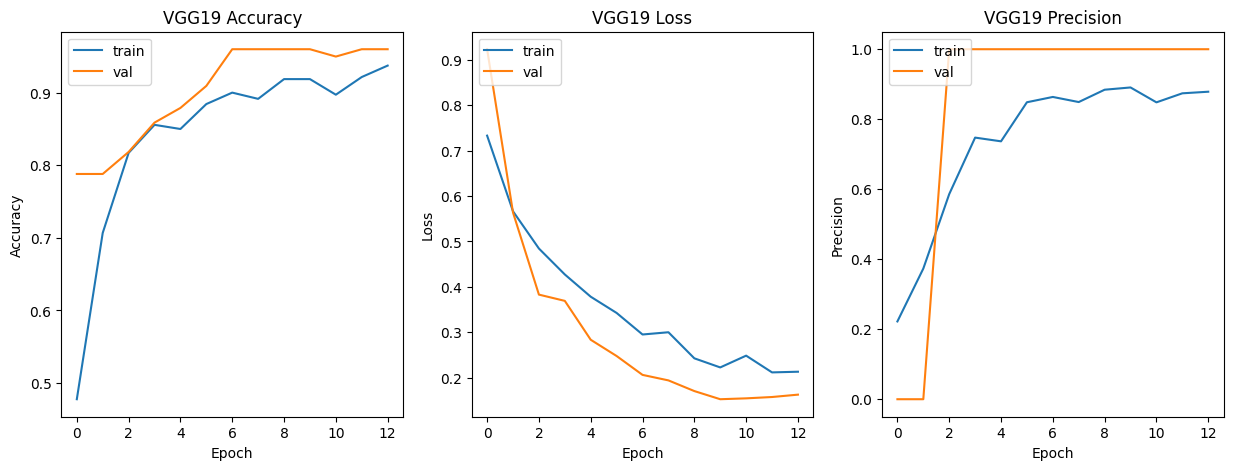

In [ ]:
plot_history(VGG19_history, 'VGG19')

#Inception V3 Model

In [ ]:
InceptionV3_base = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in InceptionV3_base.layers:
    layer.trainable = False

InceptionV3=tf.keras.Sequential()
InceptionV3.add(InceptionV3_base)
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Flatten())
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

InceptionV3.summary()

InceptionV3.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_196 (B  (None, 51200)             204800    
 atchNormalization)                                              
                                                                 
 dense_12 (Dense)            (None, 32)                1638432   
                                                                 
 batch_normalization_197 (B  (None, 32)                128       
 atchNormalization)                                   

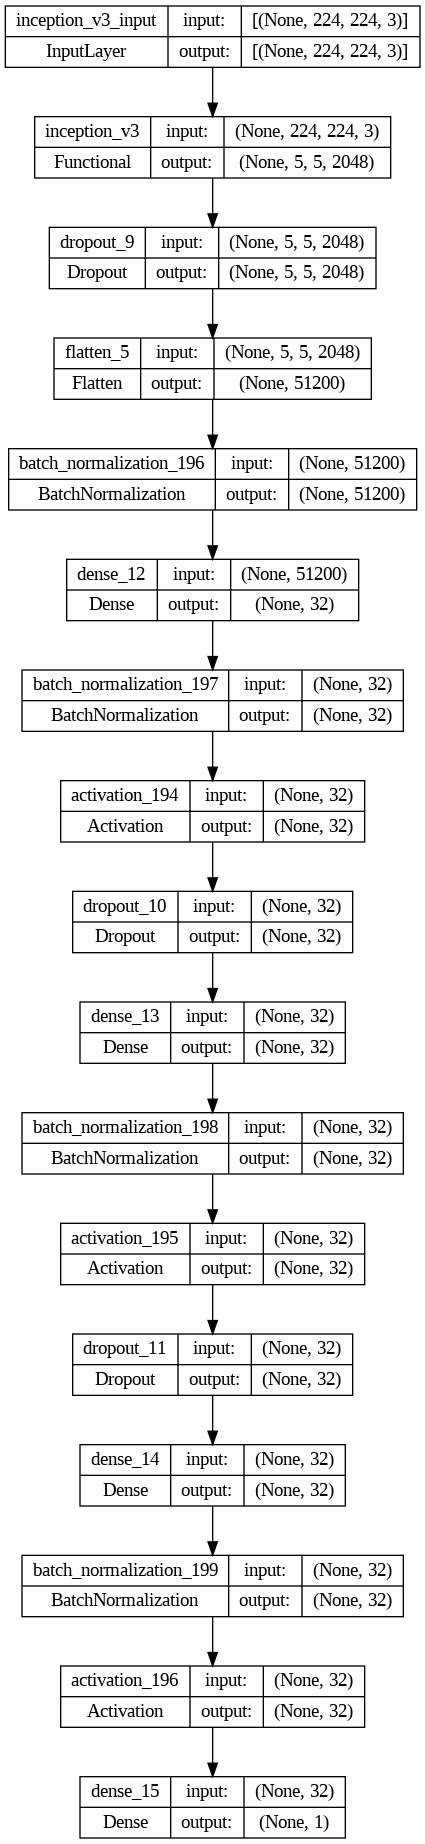

In [ ]:
tf.keras.utils.plot_model(InceptionV3, to_file='./InceptionV3.png', show_shapes=True,show_layer_names=True)
Image(filename='InceptionV3.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('InceptionV3.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

InceptionV3_history = InceptionV3.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.5548 - Accuracy: 0.7947 - Precision: 0.5228 - Recall: 0.5309 - AUC: 0.7976 - F1: 0.4082

22/22 [==============================] - 19s 553ms/step - loss: 0.5548 - Accuracy: 0.7947 - Precision: 0.5228 - Recall: 0.5309 - AUC: 0.7976 - F1: 0.4082 - val_loss: 0.6788 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.8984 - val_F1: 0.2431 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.4790 - Accuracy: 0.8054 - Precision: 0.5673 - Recall: 0.3933 - AUC: 0.7673 - F1: 0.4627

22/22 [==============================] - 11s 506ms/step - loss: 0.4790 - Accuracy: 0.8054 - Precision: 0.5673 - Recall: 0.3933 - AUC: 0.7673 - F1: 0.4627 - val_loss: 0.2142 - val_Accuracy: 0.8990 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.9844 - val_F1: 0.5372 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4090 - Accuracy: 0.8727 - Precision: 0.8081 - Recall: 0.5333 - AUC: 0.8483 - F1: 0.6476

22/22 [==============================] - 11s 492ms/step - loss: 0.4090 - Accuracy: 0.8727 - Precision: 0.8081 - Recall: 0.5333 - AUC: 0.8483 - F1: 0.6476 - val_loss: 0.2172 - val_Accuracy: 0.9192 - val_Precision: 1.0000 - val_Recall: 0.6190 - val_AUC: 0.9560 - val_F1: 0.5576 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3555 - Accuracy: 0.8841 - Precision: 0.8224 - Recall: 0.5867 - AUC: 0.9056 - F1: 0.6755

22/22 [==============================] - 9s 418ms/step - loss: 0.3555 - Accuracy: 0.8841 - Precision: 0.8224 - Recall: 0.5867 - AUC: 0.9056 - F1: 0.6755 - val_loss: 0.1613 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9835 - val_F1: 0.9006 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.2883 - Accuracy: 0.9084 - Precision: 0.8644 - Recall: 0.6800 - AUC: 0.9460 - F1: 0.7622

22/22 [==============================] - 11s 504ms/step - loss: 0.2883 - Accuracy: 0.9084 - Precision: 0.8644 - Recall: 0.6800 - AUC: 0.9460 - F1: 0.7622 - val_loss: 0.1561 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9924 - val_F1: 0.9142 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.2616 - Accuracy: 0.9142 - Precision: 0.9018 - Recall: 0.6733 - AUC: 0.9434 - F1: 0.7739

22/22 [==============================] - 11s 503ms/step - loss: 0.2616 - Accuracy: 0.9142 - Precision: 0.9018 - Recall: 0.6733 - AUC: 0.9434 - F1: 0.7739 - val_loss: 0.1447 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9939 - val_F1: 0.6375 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2274 - Accuracy: 0.9213 - Precision: 0.8992 - Recall: 0.7133 - AUC: 0.9621 - F1: 0.7974

22/22 [==============================] - 9s 417ms/step - loss: 0.2274 - Accuracy: 0.9213 - Precision: 0.8992 - Recall: 0.7133 - AUC: 0.9621 - F1: 0.7974 - val_loss: 0.1517 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9915 - val_F1: 0.6709 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.1972 - Accuracy: 0.9328 - Precision: 0.9120 - Recall: 0.7600 - AUC: 0.9763 - F1: 0.8315

22/22 [==============================] - 11s 502ms/step - loss: 0.1972 - Accuracy: 0.9328 - Precision: 0.9120 - Recall: 0.7600 - AUC: 0.9763 - F1: 0.8315 - val_loss: 0.1343 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9966 - val_F1: 0.6528 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.1768 - Accuracy: 0.9385 - Precision: 0.8963 - Recall: 0.8067 - AUC: 0.9763 - F1: 0.8378

22/22 [==============================] - 11s 509ms/step - loss: 0.1768 - Accuracy: 0.9385 - Precision: 0.8963 - Recall: 0.8067 - AUC: 0.9763 - F1: 0.8378 - val_loss: 0.1122 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.6667 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.1755 - Accuracy: 0.9299 - Precision: 0.8741 - Recall: 0.7867 - AUC: 0.9752 - F1: 0.8315

22/22 [==============================] - 10s 450ms/step - loss: 0.1755 - Accuracy: 0.9299 - Precision: 0.8741 - Recall: 0.7867 - AUC: 0.9752 - F1: 0.8315 - val_loss: 0.1170 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9927 - val_F1: 0.9333 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2060 - Accuracy: 0.9242 - Precision: 0.8345 - Recall: 0.8067 - AUC: 0.9616 - F1: 0.7890

22/22 [==============================] - 11s 504ms/step - loss: 0.2060 - Accuracy: 0.9242 - Precision: 0.8345 - Recall: 0.8067 - AUC: 0.9616 - F1: 0.7890 - val_loss: 0.1033 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.6853 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.1427 - Accuracy: 0.9557 - Precision: 0.9407 - Recall: 0.8467 - AUC: 0.9804 - F1: 0.8859

22/22 [==============================] - 11s 503ms/step - loss: 0.1427 - Accuracy: 0.9557 - Precision: 0.9407 - Recall: 0.8467 - AUC: 0.9804 - F1: 0.8859 - val_loss: 0.0904 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9963 - val_F1: 0.8762 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1440 - Accuracy: 0.9528 - Precision: 0.9270 - Recall: 0.8467 - AUC: 0.9777 - F1: 0.8902

22/22 [==============================] - 10s 445ms/step - loss: 0.1440 - Accuracy: 0.9528 - Precision: 0.9270 - Recall: 0.8467 - AUC: 0.9777 - F1: 0.8902 - val_loss: 0.0890 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.6883 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1460 - Accuracy: 0.9528 - Precision: 0.9091 - Recall: 0.8667 - AUC: 0.9834 - F1: 0.8782

22/22 [==============================] - 11s 465ms/step - loss: 0.1460 - Accuracy: 0.9528 - Precision: 0.9091 - Recall: 0.8667 - AUC: 0.9834 - F1: 0.8782 - val_loss: 0.0815 - val_Accuracy: 0.9495 - val_Precision: 0.9444 - val_Recall: 0.8095 - val_AUC: 0.9976 - val_F1: 0.6368 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1429 - Accuracy: 0.9557 - Precision: 0.9281 - Recall: 0.8600 - AUC: 0.9795 - F1: 0.8975

22/22 [==============================] - 11s 501ms/step - loss: 0.1429 - Accuracy: 0.9557 - Precision: 0.9281 - Recall: 0.8600 - AUC: 0.9795 - F1: 0.8975 - val_loss: 0.0862 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9976 - val_F1: 0.9091 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1766 - Accuracy: 0.9328 - Precision: 0.8601 - Recall: 0.8200 - AUC: 0.9726 - F1: 0.8257

22/22 [==============================] - 11s 506ms/step - loss: 0.1766 - Accuracy: 0.9328 - Precision: 0.8601 - Recall: 0.8200 - AUC: 0.9726 - F1: 0.8257 - val_loss: 0.0969 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9976 - val_F1: 0.6731 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1161 - Accuracy: 0.9585 - Precision: 0.9231 - Recall: 0.8800 - AUC: 0.9893 - F1: 0.8973
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 10s 443ms/step - loss: 0.1161 - Accuracy: 0.9585 - Precision: 0.9231 - Recall: 0.8800 - AUC: 0.9893 - F1: 0.8973 - val_loss: 0.0892 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9976 - val_F1: 0.6853 - lr: 0.0010
Epoch 17: early stopping


In [ ]:
InceptionV3_scores = InceptionV3.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 101ms/step - loss: 0.0557 - Accuracy: 0.9802 - Precision: 1.0000 - Recall: 0.9091 - AUC: 0.9984 - F1: 0.9452


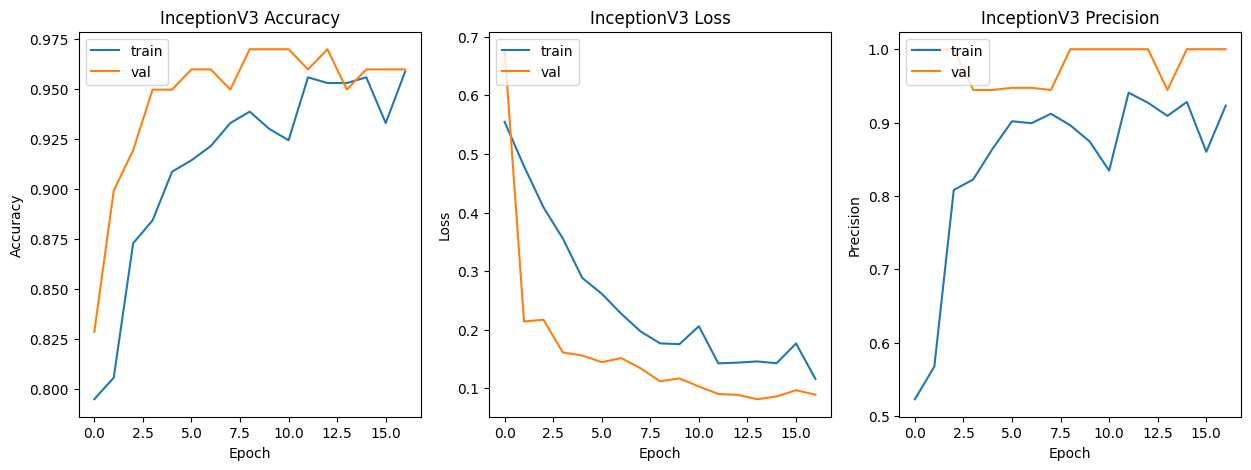

In [ ]:
plot_history(InceptionV3_history, 'InceptionV3')

#ResNet 50 Model

In [ ]:
ResNet50_base = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in ResNet50_base.layers:
    layer.trainable = False

ResNet50=tf.keras.Sequential()
ResNet50.add(ResNet50_base)
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Flatten())
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ResNet50.summary()

ResNet50.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout_12 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_200 (B  (None, 100352)            401408    
 atchNormalization)                                              
                                                                 
 dense_16 (Dense)            (None, 32)                3211296   
                                                                 
 batch_normalization_201 (B  (None, 32)                128       
 atchNormalization)                                   

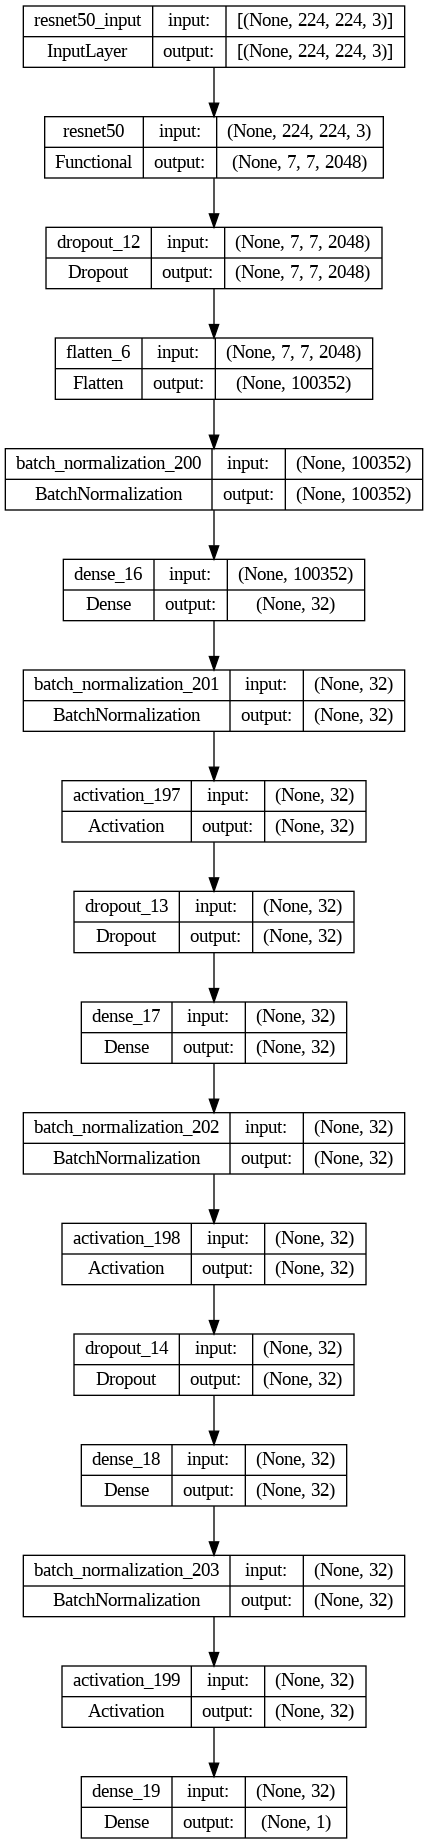

In [ ]:
tf.keras.utils.plot_model(ResNet50, to_file='./ResNet50.png', show_shapes=True,show_layer_names=True)
Image(filename='ResNet50.png')

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('ResNet50.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

ResNet50_history = ResNet50.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6136 - Accuracy: 0.7403 - Precision: 0.4265 - Recall: 0.5979 - AUC: 0.7869 - F1: 0.3923

22/22 [==============================] - 18s 539ms/step - loss: 0.6136 - Accuracy: 0.7403 - Precision: 0.4265 - Recall: 0.5979 - AUC: 0.7869 - F1: 0.3923 - val_loss: 0.6114 - val_Accuracy: 0.6970 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.4121 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5318 - Accuracy: 0.7611 - Precision: 0.4309 - Recall: 0.3533 - AUC: 0.7020 - F1: 0.3822

22/22 [==============================] - 11s 510ms/step - loss: 0.5318 - Accuracy: 0.7611 - Precision: 0.4309 - Recall: 0.3533 - AUC: 0.7020 - F1: 0.3822 - val_loss: 0.4790 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.7521 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4999 - Accuracy: 0.7983 - Precision: 0.5529 - Recall: 0.3133 - AUC: 0.7216 - F1: 0.3922

22/22 [==============================] - 11s 513ms/step - loss: 0.4999 - Accuracy: 0.7983 - Precision: 0.5529 - Recall: 0.3133 - AUC: 0.7216 - F1: 0.3922 - val_loss: 0.4295 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8208 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4433 - Accuracy: 0.8355 - Precision: 0.7273 - Recall: 0.3733 - AUC: 0.7882 - F1: 0.4831

22/22 [==============================] - 11s 461ms/step - loss: 0.4433 - Accuracy: 0.8355 - Precision: 0.7273 - Recall: 0.3733 - AUC: 0.7882 - F1: 0.4831 - val_loss: 0.3965 - val_Accuracy: 0.8384 - val_Precision: 1.0000 - val_Recall: 0.2381 - val_AUC: 0.8825 - val_F1: 0.3556 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3964 - Accuracy: 0.8441 - Precision: 0.7531 - Recall: 0.4067 - AUC: 0.8519 - F1: 0.4951

22/22 [==============================] - 11s 513ms/step - loss: 0.3964 - Accuracy: 0.8441 - Precision: 0.7531 - Recall: 0.4067 - AUC: 0.8519 - F1: 0.4951 - val_loss: 0.3863 - val_Accuracy: 0.8384 - val_Precision: 1.0000 - val_Recall: 0.2381 - val_AUC: 0.8987 - val_F1: 0.2701 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3846 - Accuracy: 0.8455 - Precision: 0.7692 - Recall: 0.4000 - AUC: 0.8504 - F1: 0.4992

22/22 [==============================] - 11s 514ms/step - loss: 0.3846 - Accuracy: 0.8455 - Precision: 0.7692 - Recall: 0.4000 - AUC: 0.8504 - F1: 0.4992 - val_loss: 0.4274 - val_Accuracy: 0.8384 - val_Precision: 1.0000 - val_Recall: 0.2381 - val_AUC: 0.8462 - val_F1: 0.3687 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3471 - Accuracy: 0.8627 - Precision: 0.7872 - Recall: 0.4933 - AUC: 0.8816 - F1: 0.6082

22/22 [==============================] - 11s 502ms/step - loss: 0.3471 - Accuracy: 0.8627 - Precision: 0.7872 - Recall: 0.4933 - AUC: 0.8816 - F1: 0.6082 - val_loss: 0.3366 - val_Accuracy: 0.8384 - val_Precision: 1.0000 - val_Recall: 0.2381 - val_AUC: 0.9255 - val_F1: 0.2753 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.3447 - Accuracy: 0.8684 - Precision: 0.8085 - Recall: 0.5067 - AUC: 0.8848 - F1: 0.6076

22/22 [==============================] - 10s 431ms/step - loss: 0.3447 - Accuracy: 0.8684 - Precision: 0.8085 - Recall: 0.5067 - AUC: 0.8848 - F1: 0.6076 - val_loss: 0.3579 - val_Accuracy: 0.8586 - val_Precision: 1.0000 - val_Recall: 0.3333 - val_AUC: 0.8932 - val_F1: 0.3500 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.3340 - Accuracy: 0.8684 - Precision: 0.8152 - Recall: 0.5000 - AUC: 0.8836 - F1: 0.6302

22/22 [==============================] - 11s 511ms/step - loss: 0.3340 - Accuracy: 0.8684 - Precision: 0.8152 - Recall: 0.5000 - AUC: 0.8836 - F1: 0.6302 - val_loss: 0.3644 - val_Accuracy: 0.8788 - val_Precision: 1.0000 - val_Recall: 0.4286 - val_AUC: 0.8690 - val_F1: 0.4625 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2933 - Accuracy: 0.8770 - Precision: 0.8077 - Recall: 0.5600 - AUC: 0.9196 - F1: 0.6482
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 11s 512ms/step - loss: 0.2933 - Accuracy: 0.8770 - Precision: 0.8077 - Recall: 0.5600 - AUC: 0.9196 - F1: 0.6482 - val_loss: 0.3423 - val_Accuracy: 0.8586 - val_Precision: 1.0000 - val_Recall: 0.3333 - val_AUC: 0.9066 - val_F1: 0.3512 - lr: 0.0010
Epoch 10: early stopping


In [ ]:
ResNet50_scores = ResNet50.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 104ms/step - loss: 0.3469 - Accuracy: 0.8416 - Precision: 1.0000 - Recall: 0.2727 - AUC: 0.9354 - F1: 0.3694


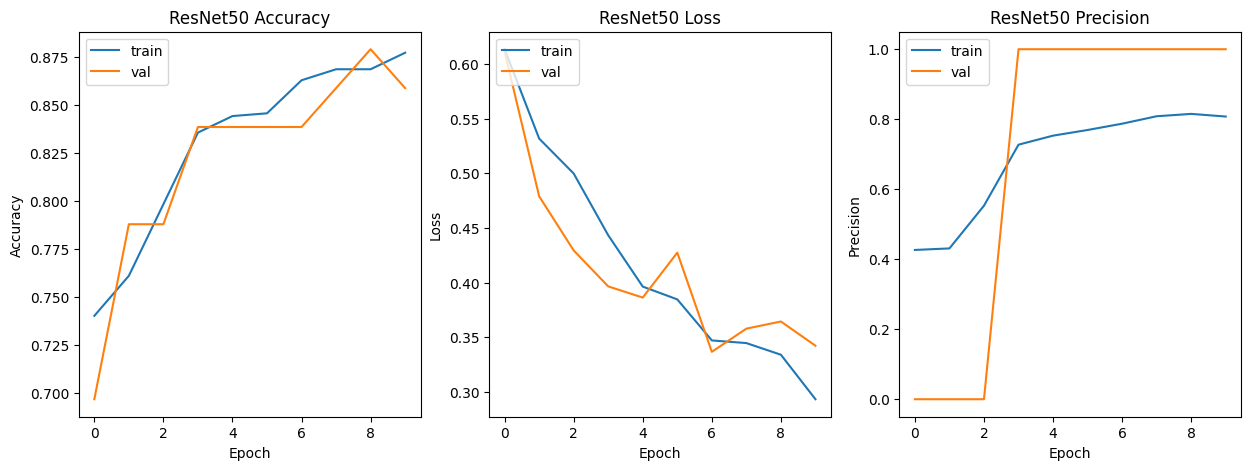

In [ ]:
plot_history(ResNet50_history, 'ResNet50')

#Analysis of Prediction and Real Values

1/1 [==============================] - 0s 38ms/step


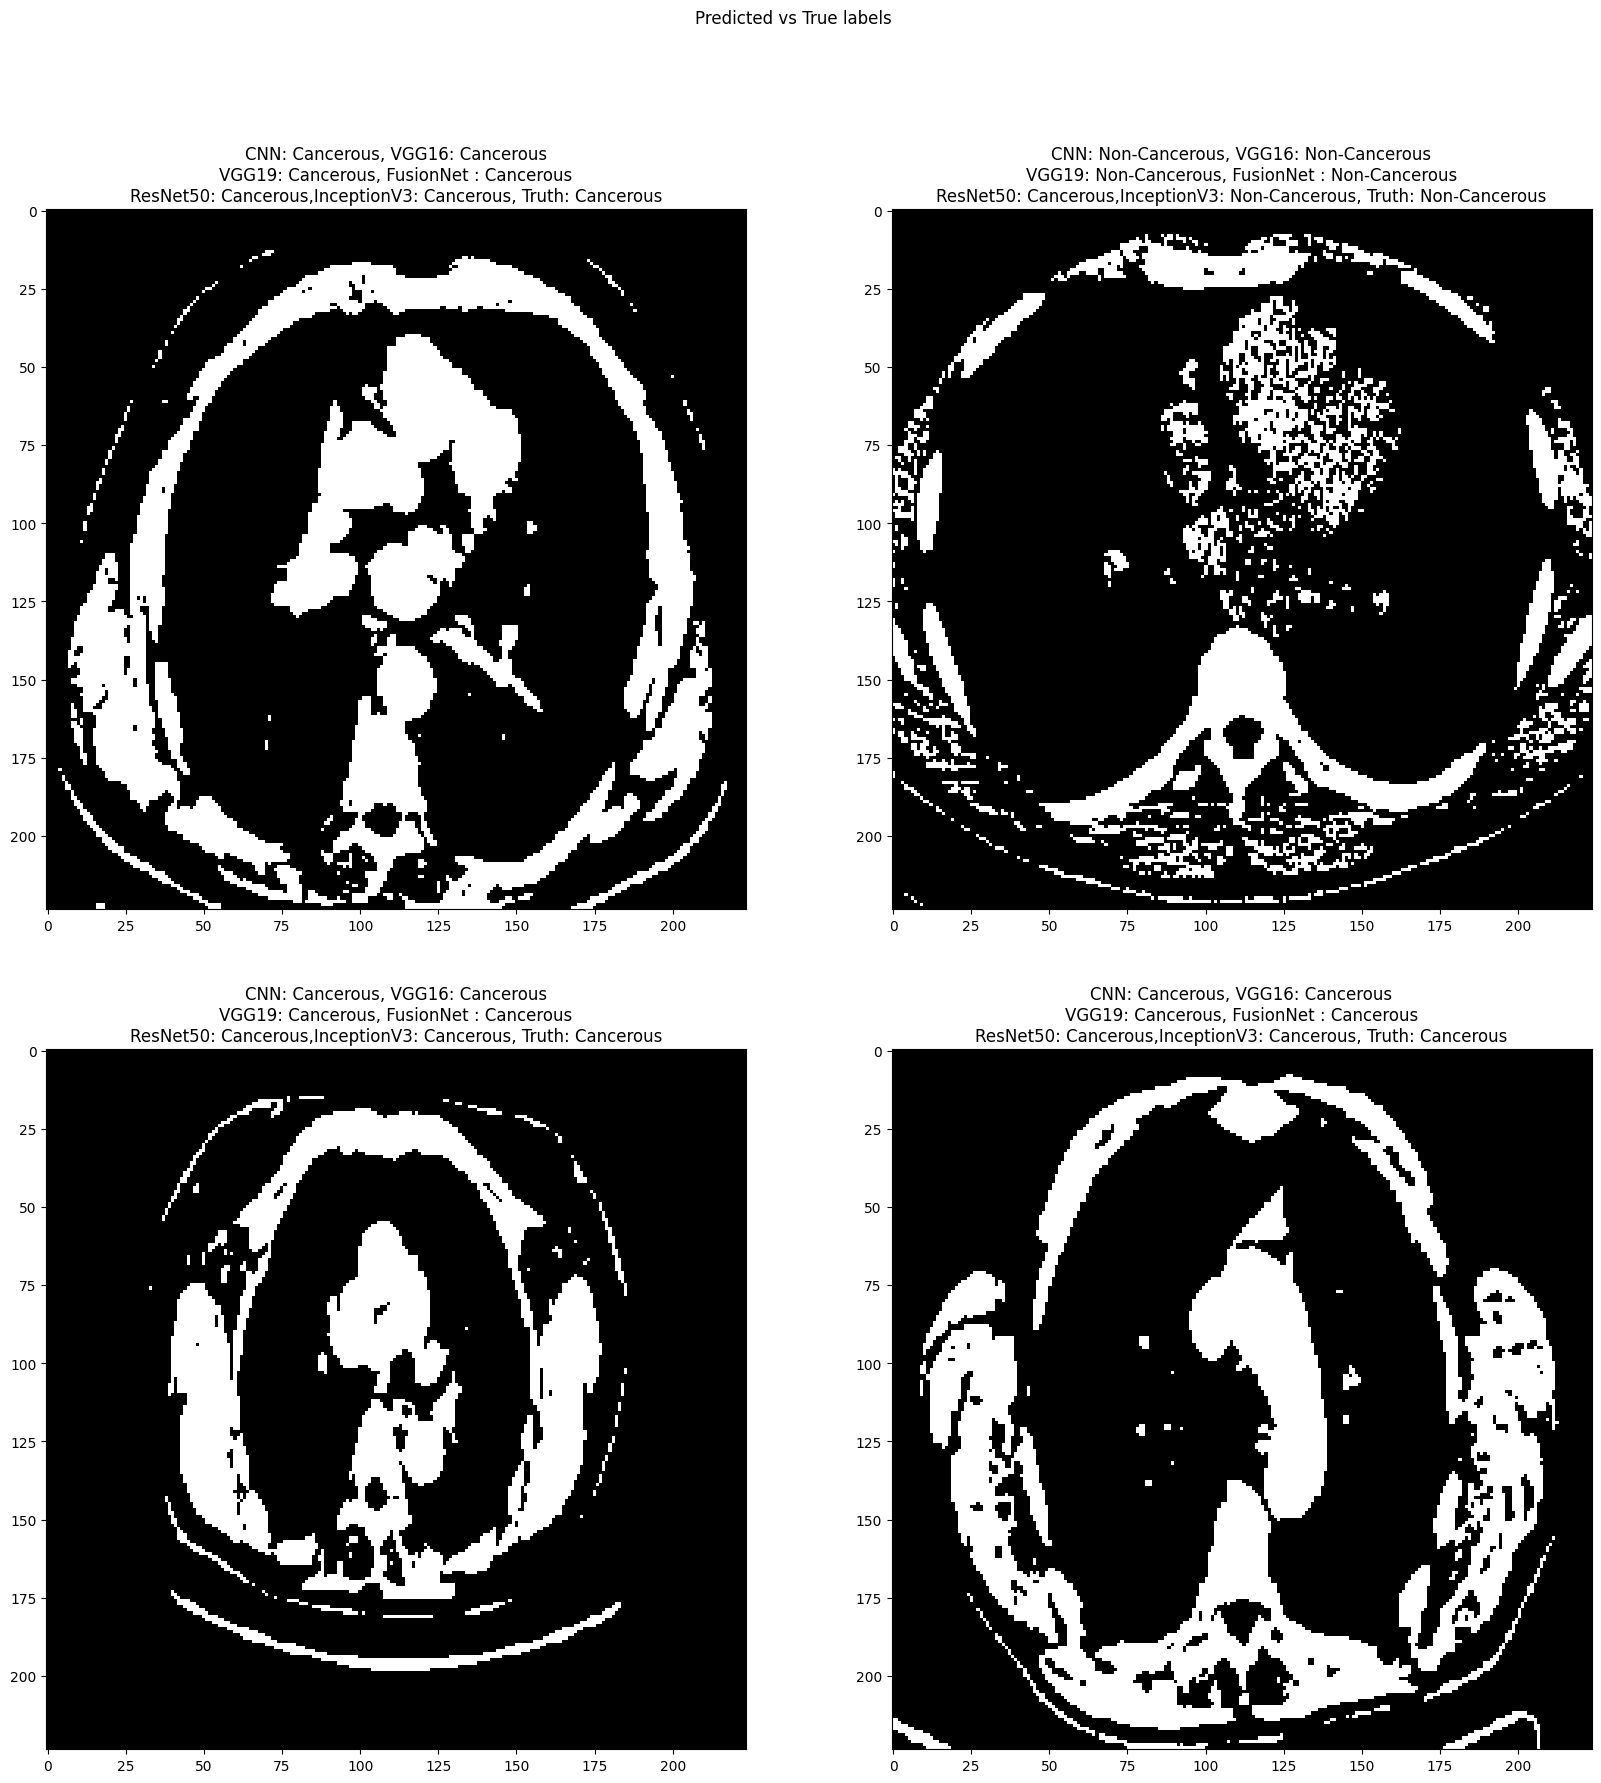

In [ ]:
batch = next(test_dataset)

def predAll(batch, i):
  label_dict = {0: 'Cancerous', 1: 'Non-Cancerous'}
  cnnPred = 0 if CNN.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg16Pred = 0 if VGG16.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  fusionnetPred = 0 if hybrid_model.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg19Pred = 0 if VGG19.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  inceptionv3Pred = 0 if InceptionV3.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  resnet50Pred = 0 if ResNet50.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1

  return f'CNN: {label_dict[cnnPred]}, VGG16: {label_dict[vgg16Pred]}\nVGG19: {label_dict[vgg19Pred]}, FusionNet : {label_dict[fusionnetPred ]}\nResNet50: {label_dict[resnet50Pred]},InceptionV3: {label_dict[inceptionv3Pred]}, Truth: {label_dict[int(batch[1][i])]}'


plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
plt.imshow(batch[0][0])
label = predAll(batch, 0)
ax1.set_title(label)


ax2 = plt.subplot(2, 2, 2)
plt.imshow(batch[0][5])
label = predAll(batch, 1)
ax2.set_title(label)

ax3 = plt.subplot(2, 2, 3)
plt.imshow(batch[0][2])
label = predAll(batch, 2)
ax3.set_title(label)

ax4 = plt.subplot(2, 2, 4)
plt.imshow(batch[0][3])
label = predAll(batch, 3)
ax4.set_title(label)


plt.suptitle('Predicted vs True labels')
plt.show()


In [ ]:
eval = [CNN_scores, VGG16_scores, VGG19_scores, hybrid_scores, ResNet50_scores, InceptionV3_scores]
eval

[[0.649659276008606,
  0.6930692791938782,
  0.4134615361690521,
  0.9772727489471436,
  0.8283227682113647,
  0.5678163766860962],
 [0.022979628294706345,
  0.9950494766235352,
  0.9777777791023254,
  1.0,
  1.0,
  0.9924812316894531],
 [0.11300433427095413,
  0.9702970385551453,
  1.0,
  0.8636363744735718,
  0.9853998422622681,
  0.9302397966384888],
 [0.0988815501332283,
  0.9653465151786804,
  0.9111111164093018,
  0.9318181872367859,
  0.9959723949432373,
  0.8832014799118042],
 [0.34694740176200867,
  0.8415841460227966,
  1.0,
  0.27272728085517883,
  0.93541419506073,
  0.3693877160549164],
 [0.055742353200912476,
  0.9801980257034302,
  1.0,
  0.9090909361839294,
  0.9984177350997925,
  0.9452144503593445]]

###Analysis of Different Models

In [ ]:
indices = ['CNN', 'VGG16', 'VGG19', 'FusionNet', 'ResNet', 'InceptionV3']
scores = pd.DataFrame({
    'Accuracy': [item[1] for item in eval],
    'Precision': [item[2] for item in eval],
    'Recall': [item[3] for item in eval],
    'AUC': [item[4] for item in eval],
    'F1': [item[5] for item in eval]
}, index=indices)

# Print the DataFrame
print(scores)

             Accuracy  Precision    Recall       AUC        F1
CNN          0.693069   0.413462  0.977273  0.828323  0.567816
VGG16        0.995049   0.977778  1.000000  1.000000  0.992481
VGG19        0.970297   1.000000  0.863636  0.985400  0.930240
FusionNet    0.965347   0.911111  0.931818  0.995972  0.883201
ResNet       0.841584   1.000000  0.272727  0.935414  0.369388
InceptionV3  0.980198   1.000000  0.909091  0.998418  0.945214


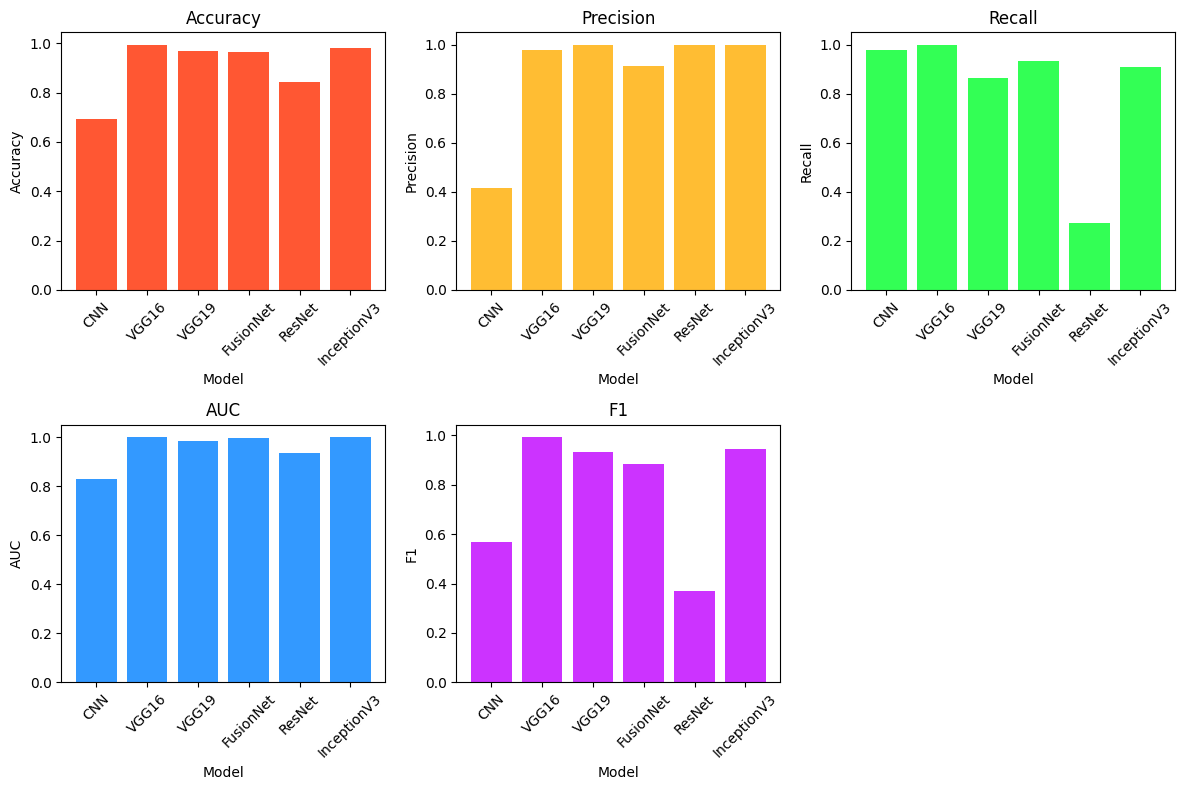

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'scores' with appropriate data

# Original code for subplots and layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.ravel()

# Define a beautiful color palette
beautiful_colors = ['#FF5733', '#FFBD33', '#33FF55', '#3399FF', '#CC33FF']

for i, column in enumerate(scores.columns):
    axs[i].bar(scores.index, scores[column], color=beautiful_colors[i])
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column}')
    axs[i].tick_params(axis='x', rotation=45)

for i in range(len(scores.columns), len(axs)):
    plt.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [ ]:
eval = np.array(eval)
np.savetxt('eval.txt', eval)

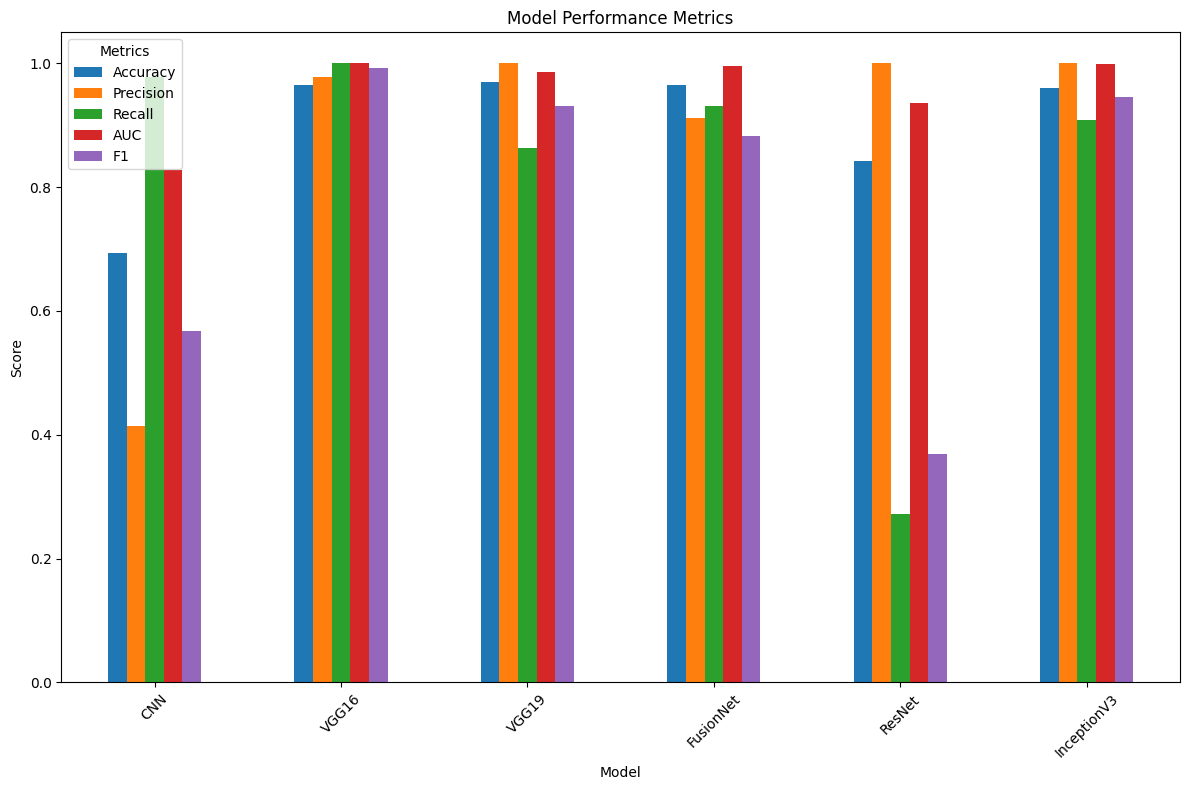

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the models and their respective metrics
data = {
    'Model': ['CNN', 'VGG16', 'VGG19', 'FusionNet', 'ResNet', 'InceptionV3'],
    'Accuracy': [0.693069, 0.965049, 0.970297, 0.965347, 0.841584, 0.960198],
    'Precision': [0.413462, 0.977778, 1.000000, 0.911111, 1.000000, 1.000000],
    'Recall': [0.977273, 1.000000, 0.863636, 0.931818, 0.272727, 0.909091],
    'AUC': [0.828323, 1.000000, 0.985400, 0.995972, 0.935414, 0.998418],
    'F1': [0.567816, 0.992481, 0.930240, 0.883201, 0.369388, 0.945214]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the model names as the index
df.set_index('Model', inplace=True)

# Plotting
df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


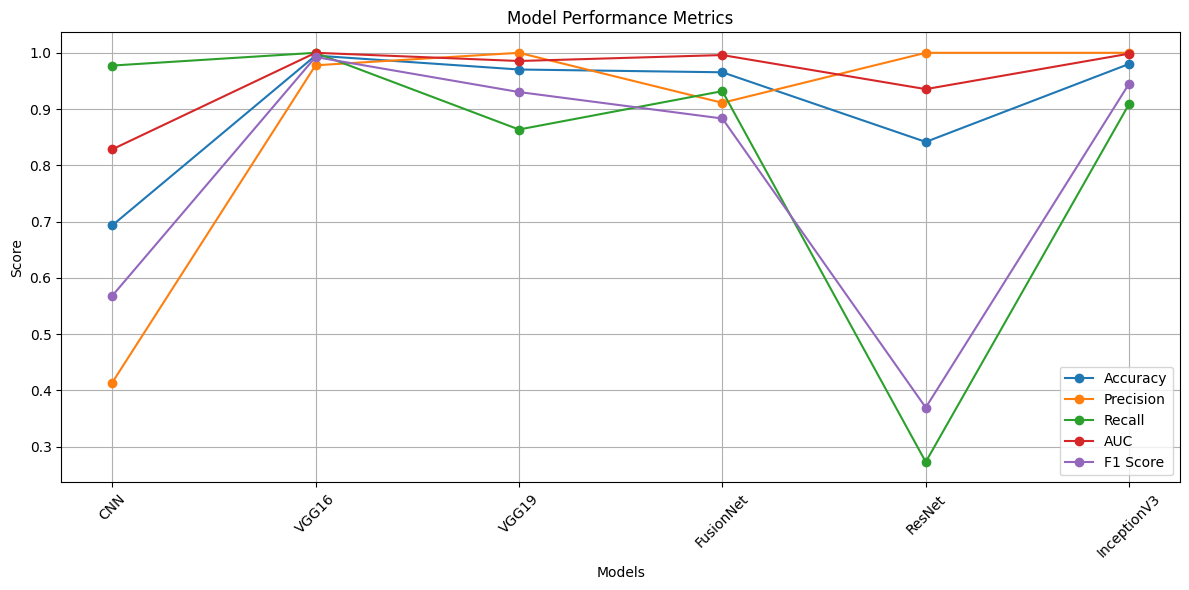

In [ ]:
import matplotlib.pyplot as plt

# Data for the models and their respective metrics
models = ['CNN', 'VGG16', 'VGG19', 'FusionNet', 'ResNet', 'InceptionV3']
accuracy = [0.693069, 0.995049, 0.970297, 0.965347, 0.841584, 0.980198]
precision = [0.413462, 0.977778, 1.000000, 0.911111, 1.000000, 1.000000]
recall = [0.977273, 1.000000, 0.863636, 0.931818, 0.272727, 0.909091]
auc = [0.828323, 1.000000, 0.985400, 0.995972, 0.935414, 0.998418]
f1 = [0.567816, 0.992481, 0.930240, 0.883201, 0.369388, 0.945214]

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(models, accuracy, label='Accuracy', marker='o')
plt.plot(models, precision, label='Precision', marker='o')
plt.plot(models, recall, label='Recall', marker='o')
plt.plot(models, auc, label='AUC', marker='o')
plt.plot(models, f1, label='F1 Score', marker='o')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


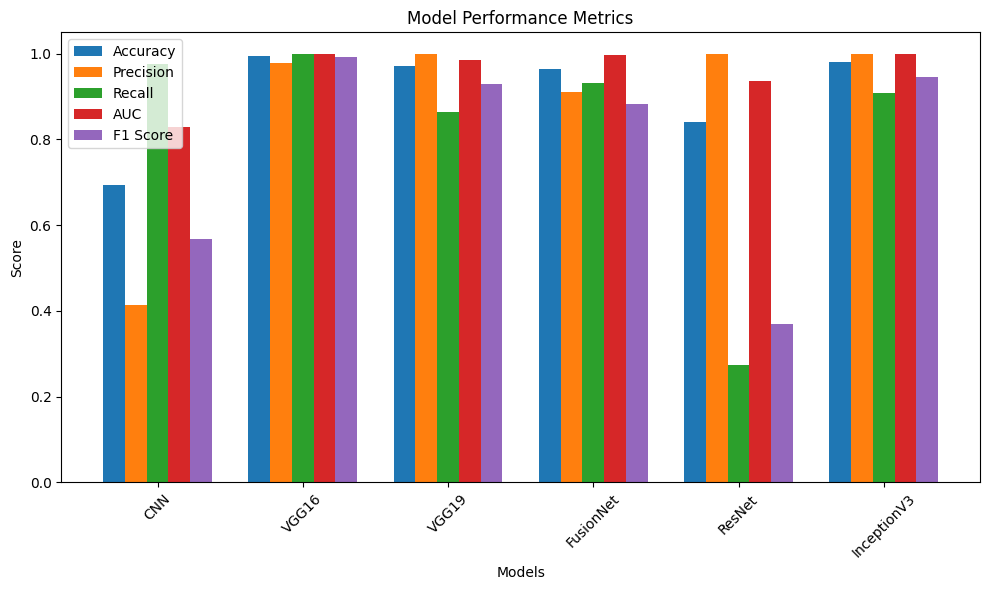

In [ ]:
import matplotlib.pyplot as plt

# Data for the models and their respective metrics
models = ['CNN', 'VGG16', 'VGG19', 'FusionNet', 'ResNet', 'InceptionV3']
accuracy = [0.693069, 0.995049, 0.970297, 0.965347, 0.841584, 0.980198]
precision = [0.413462, 0.977778, 1.000000, 0.911111, 1.000000, 1.000000]
recall = [0.977273, 1.000000, 0.863636, 0.931818, 0.272727, 0.909091]
auc = [0.828323, 1.000000, 0.985400, 0.995972, 0.935414, 0.998418]
f1 = [0.567816, 0.992481, 0.930240, 0.883201, 0.369388, 0.945214]

x = range(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15

rects1 = ax.bar(x, accuracy, width=bar_width, label='Accuracy')
rects2 = ax.bar([p + bar_width for p in x], precision, width=bar_width, label='Precision')
rects3 = ax.bar([p + 2 * bar_width for p in x], recall, width=bar_width, label='Recall')
rects4 = ax.bar([p + 3 * bar_width for p in x], auc, width=bar_width, label='AUC')
rects5 = ax.bar([p + 4 * bar_width for p in x], f1, width=bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks([p + 2 * bar_width for p in x])
ax.set_xticklabels(models)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


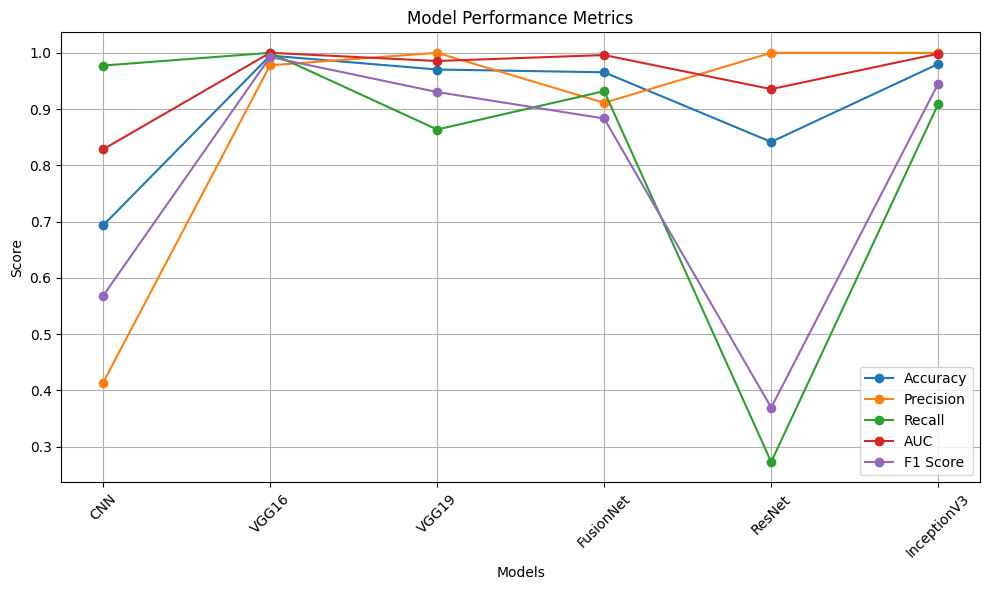

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, label='Accuracy', marker='o')
plt.plot(models, precision, label='Precision', marker='o')
plt.plot(models, recall, label='Recall', marker='o')
plt.plot(models, auc, label='AUC', marker='o')
plt.plot(models, f1, label='F1 Score', marker='o')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


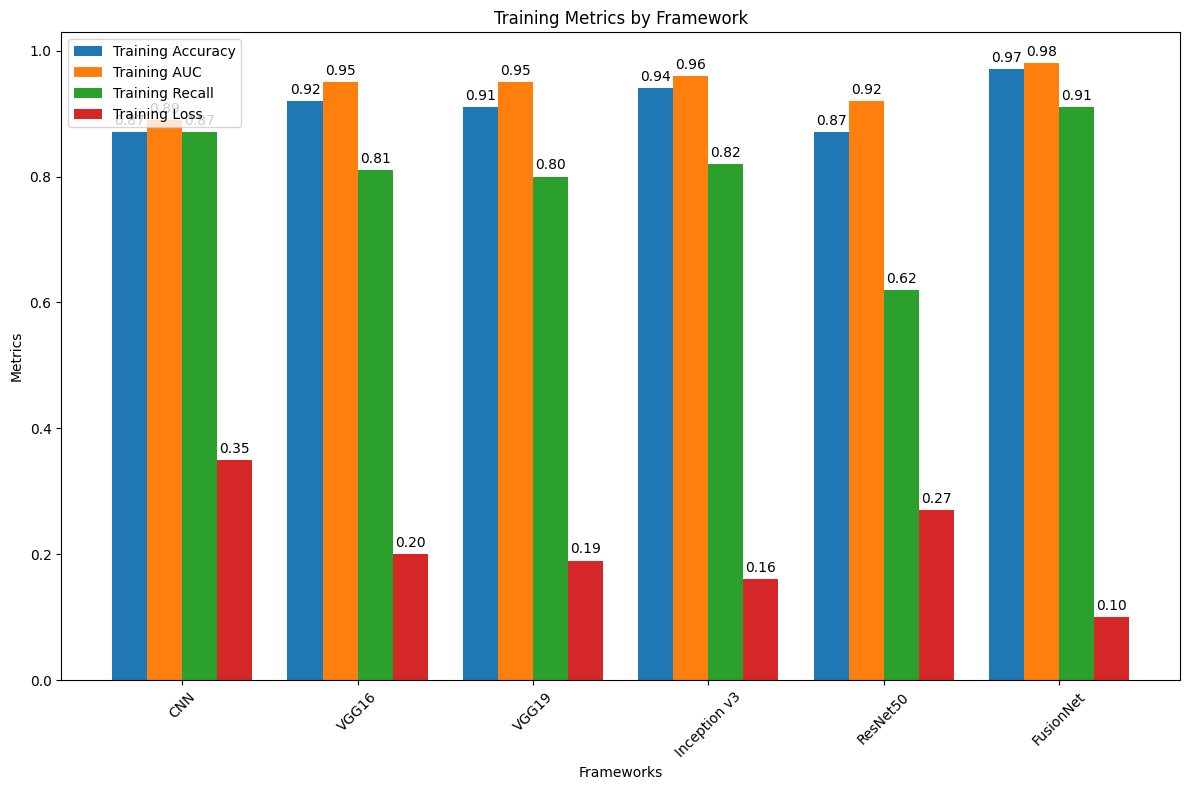

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
frameworks = ['CNN', 'VGG16', 'VGG19', 'Inception v3', 'ResNet50', 'FusionNet']
training_accuracy = [0.87, 0.92, 0.91, 0.94, 0.87, 0.97]
training_auc = [0.89, 0.95, 0.95, 0.96, 0.92, 0.98]
training_recall = [0.87, 0.81, 0.80, 0.82, 0.62, 0.91]
training_loss = [0.35, 0.20, 0.19, 0.16, 0.27, 0.10]

x = np.arange(len(frameworks))  # the label locations
width = 0.2  # the width of the bars

# Create subplots to plot the metrics
fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - 1.5 * width, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x - 0.5 * width, training_auc, width, label='Training AUC')
rects3 = ax.bar(x + 0.5 * width, training_recall, width, label='Training Recall')
rects4 = ax.bar(x + 1.5 * width, training_loss, width, label='Training Loss')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Frameworks')
ax.set_ylabel('Metrics')
ax.set_title('Training Metrics by Framework')
ax.set_xticks(x)
ax.set_xticklabels(frameworks)
ax.legend()

# Label with label_type 'center' to place label at the center of the bar
for rect in rects1 + rects2 + rects3 + rects4:
    height = rect.get_height()
    ax.annotate('%.2f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


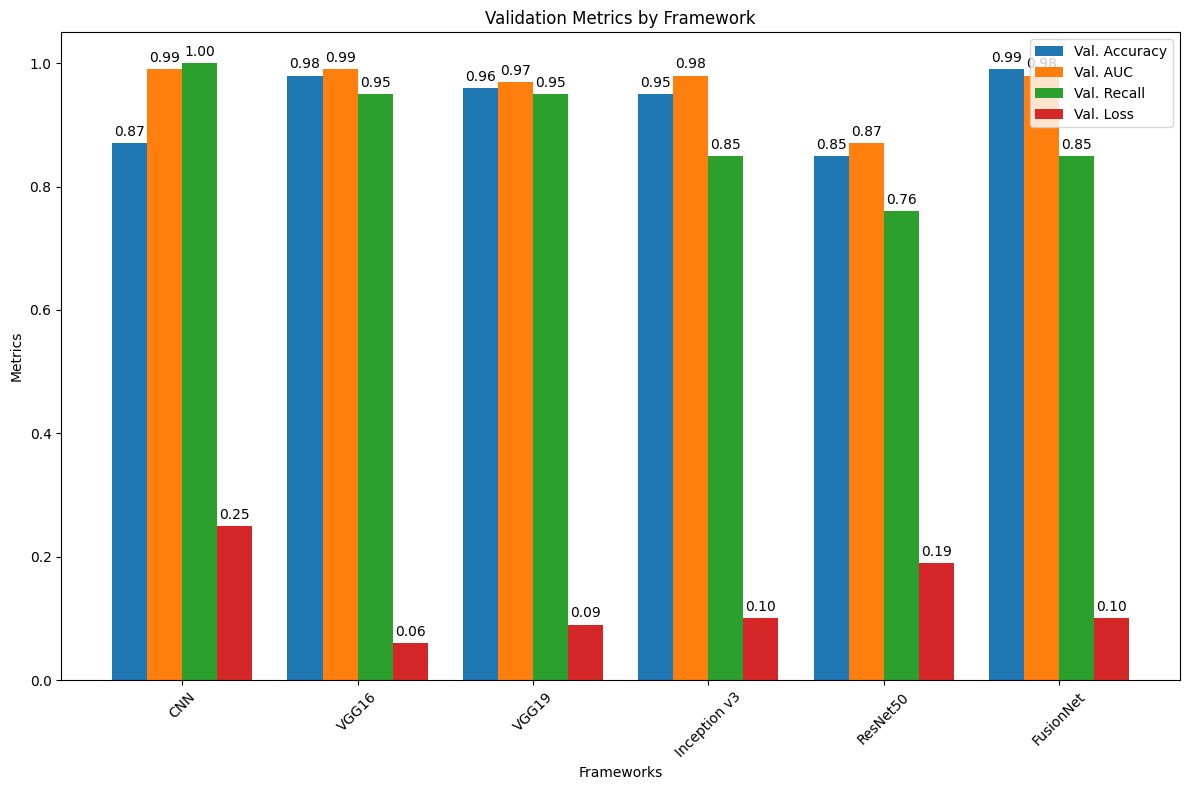

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
frameworks = ['CNN', 'VGG16', 'VGG19', 'Inception v3', 'ResNet50', 'FusionNet']
val_accuracy = [0.87, 0.98, 0.96, 0.95, 0.85, 0.99]
val_auc = [0.99, 0.99, 0.97, 0.98, 0.87, 0.98]
val_recall = [1.00, 0.95, 0.95, 0.85, 0.76, 0.85]
val_loss = [0.25, 0.06, 0.09, 0.10, 0.19, 0.10]

x = np.arange(len(frameworks))  # the label locations
width = 0.2  # the width of the bars

# Create subplots to plot the metrics
fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - 1.5 * width, val_accuracy, width, label='Val. Accuracy')
rects2 = ax.bar(x - 0.5 * width, val_auc, width, label='Val. AUC')
rects3 = ax.bar(x + 0.5 * width, val_recall, width, label='Val. Recall')
rects4 = ax.bar(x + 1.5 * width, val_loss, width, label='Val. Loss')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Frameworks')
ax.set_ylabel('Metrics')
ax.set_title('Validation Metrics by Framework')
ax.set_xticks(x)
ax.set_xticklabels(frameworks)
ax.legend()

# Label with label_type 'center' to place label at the center of the bar
for rect in rects1 + rects2 + rects3 + rects4:
    height = rect.get_height()
    ax.annotate('%.2f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


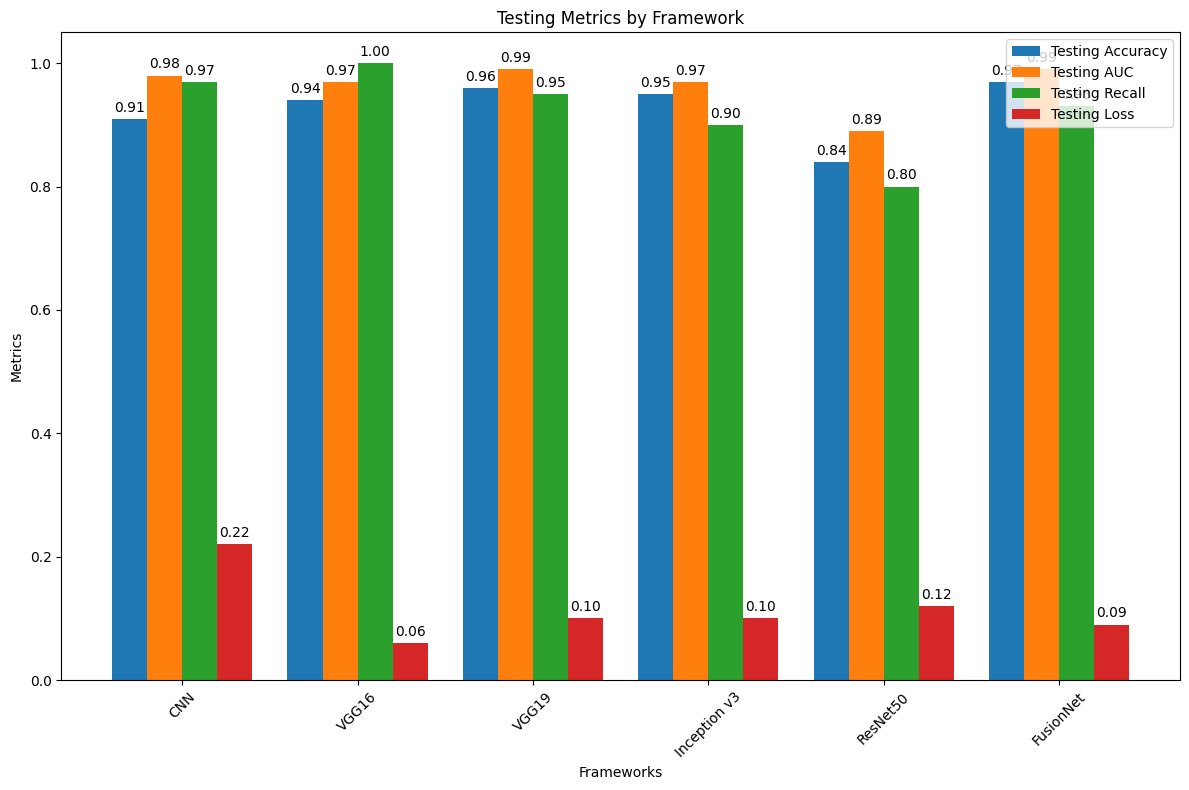

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
frameworks = ['CNN', 'VGG16', 'VGG19', 'Inception v3', 'ResNet50', 'FusionNet']
testing_accuracy = [0.91, 0.94, 0.96, 0.95, 0.84, 0.97]
testing_auc = [0.98, 0.97, 0.99, 0.97, 0.89, 0.99]
testing_recall = [0.97, 1.00, 0.95, 0.90, 0.80, 0.93]
testing_loss = [0.22, 0.06, 0.10, 0.10, 0.12, 0.09]

x = np.arange(len(frameworks))  # the label locations
width = 0.2  # the width of the bars

# Create subplots to plot the metrics
fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - 1.5 * width, testing_accuracy, width, label='Testing Accuracy')
rects2 = ax.bar(x - 0.5 * width, testing_auc, width, label='Testing AUC')
rects3 = ax.bar(x + 0.5 * width, testing_recall, width, label='Testing Recall')
rects4 = ax.bar(x + 1.5 * width, testing_loss, width, label='Testing Loss')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Frameworks')
ax.set_ylabel('Metrics')
ax.set_title('Testing Metrics by Framework')
ax.set_xticks(x)
ax.set_xticklabels(frameworks)
ax.legend()

# Label with label_type 'center' to place label at the center of the bar
for rect in rects1 + rects2 + rects3 + rects4:
    height = rect.get_height()
    ax.annotate('%.2f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
